# Crime Dataset Analysis: Boston

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
import scipy as sp
import gc

In [3]:
fileURL = './tmpsdhjynao.csv'
crime_data = pd.read_csv(fileURL, header=0)

In [4]:
crime_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,Friday,7,NaN,BROOKS ST,NaN,NaN,"(0.00000000, 0.00000000)"
2,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
3,I90583827,1402,NaN,VANDALISM,E18,498,0,2019-11-02 05:09:00,2019,11,Saturday,5,NaN,BRADLEE ST,NaN,NaN,"(0.00000000, 0.00000000)"
4,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)"


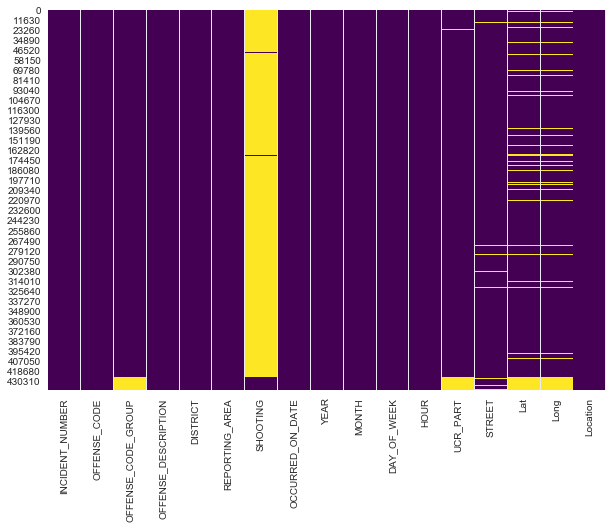

In [5]:
plt.figure(figsize=(10,7))
sns.heatmap(crime_data.isnull(), cbar = False, cmap = 'viridis')

In [6]:
crime_data.shape

(441916, 17)

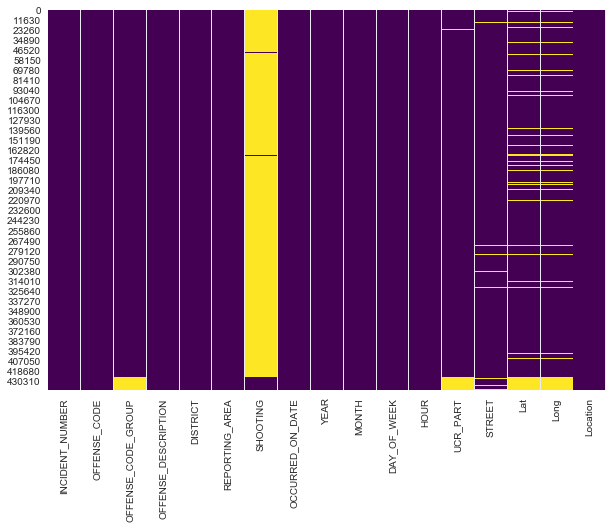

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(crime_data.isnull(), cbar = False, cmap = 'viridis')

In [8]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441916 entries, 0 to 441915
Data columns (total 17 columns):
INCIDENT_NUMBER        441916 non-null object
OFFENSE_CODE           441916 non-null int64
OFFENSE_CODE_GROUP     426840 non-null object
OFFENSE_DESCRIPTION    441916 non-null object
DISTRICT               439664 non-null object
REPORTING_AREA         441916 non-null object
SHOOTING               16823 non-null object
OCCURRED_ON_DATE       441916 non-null object
YEAR                   441916 non-null int64
MONTH                  441916 non-null int64
DAY_OF_WEEK            441916 non-null object
HOUR                   441916 non-null int64
UCR_PART               426730 non-null object
STREET                 427958 non-null object
Lat                    399636 non-null float64
Long                   399636 non-null float64
Location               441916 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 57.3+ MB


In [9]:
# Statistical data of the number of missing values
print("boston_crimes dataset: missing values check")
crime_data= crime_data.replace('?', np.NaN)
crime_data = crime_data.replace(r'^\s*$', np.nan, regex=True)
crime_data.isnull().sum()

boston_crimes dataset: missing values check


INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP      15076
OFFENSE_DESCRIPTION         0
DISTRICT                 2252
REPORTING_AREA          29141
SHOOTING               425093
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                15186
STREET                  13958
Lat                     42280
Long                    42280
Location                    0
dtype: int64

In [10]:
crime_data = crime_data.iloc[1:]
crime_data = crime_data.dropna()

In [11]:
crime_data['OCCURRED_ON_DATE']= pd.to_datetime(crime_data['OCCURRED_ON_DATE'], format='%Y-%m-%d %H:%M:%S' , errors='coerce')

In [12]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 876 to 426308
Data columns (total 17 columns):
INCIDENT_NUMBER        1663 non-null object
OFFENSE_CODE           1663 non-null int64
OFFENSE_CODE_GROUP     1663 non-null object
OFFENSE_DESCRIPTION    1663 non-null object
DISTRICT               1663 non-null object
REPORTING_AREA         1663 non-null object
SHOOTING               1663 non-null object
OCCURRED_ON_DATE       1663 non-null datetime64[ns]
YEAR                   1663 non-null int64
MONTH                  1663 non-null int64
DAY_OF_WEEK            1663 non-null object
HOUR                   1663 non-null int64
UCR_PART               1663 non-null object
STREET                 1663 non-null object
Lat                    1663 non-null float64
Long                   1663 non-null float64
Location               1663 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(10)
memory usage: 233.9+ KB


## Initial Data Analysis

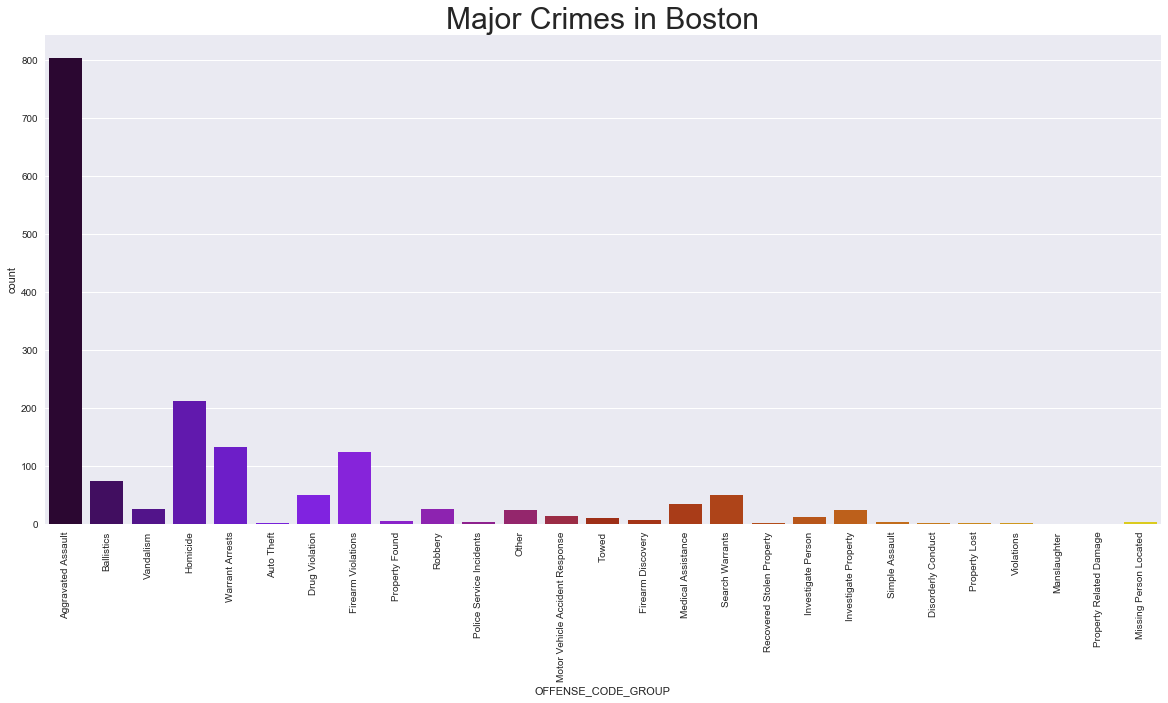

In [13]:
# Crimes according to crime type
plt.rcParams['figure.figsize'] = (20, 9)
sns.countplot(crime_data['OFFENSE_CODE_GROUP'], palette = 'gnuplot')
plt.title('Major Crimes in Boston', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

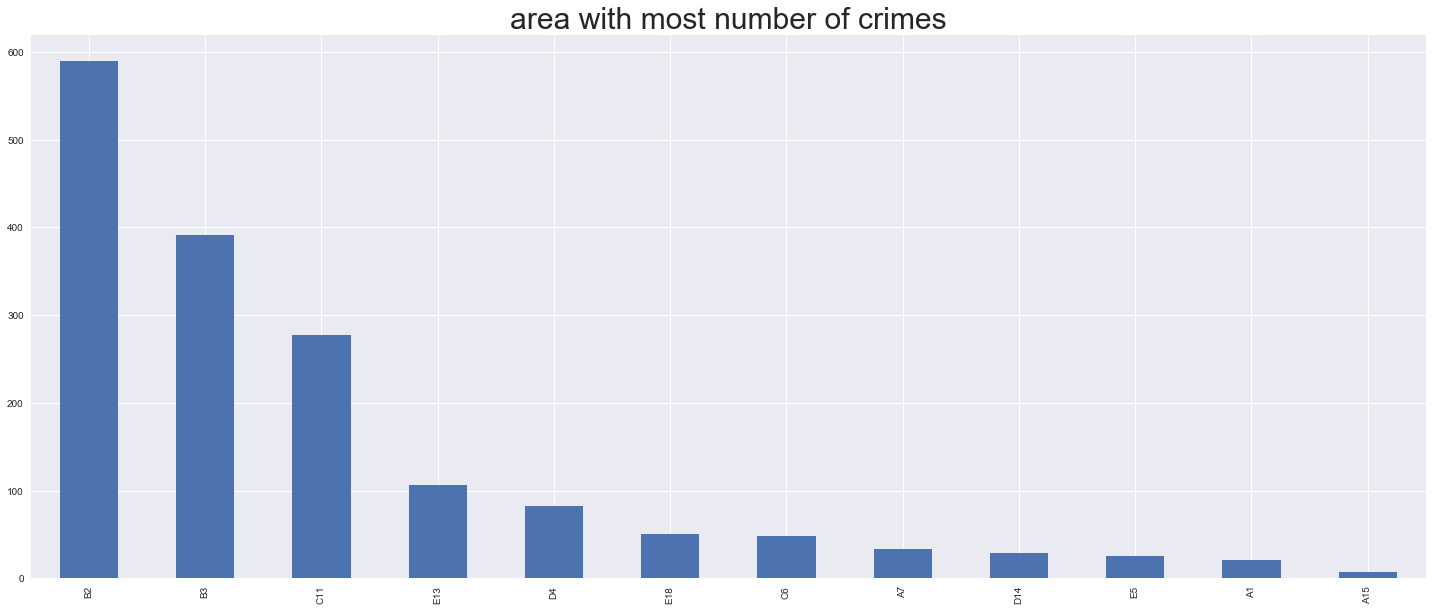

In [14]:
# Districts with count of respective crimes

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

crime_data['DISTRICT'].value_counts().plot.bar(figsize = (25, 10))

plt.title('area with most number of crimes',fontsize = 30)

plt.xticks(rotation = 90)
plt.show()

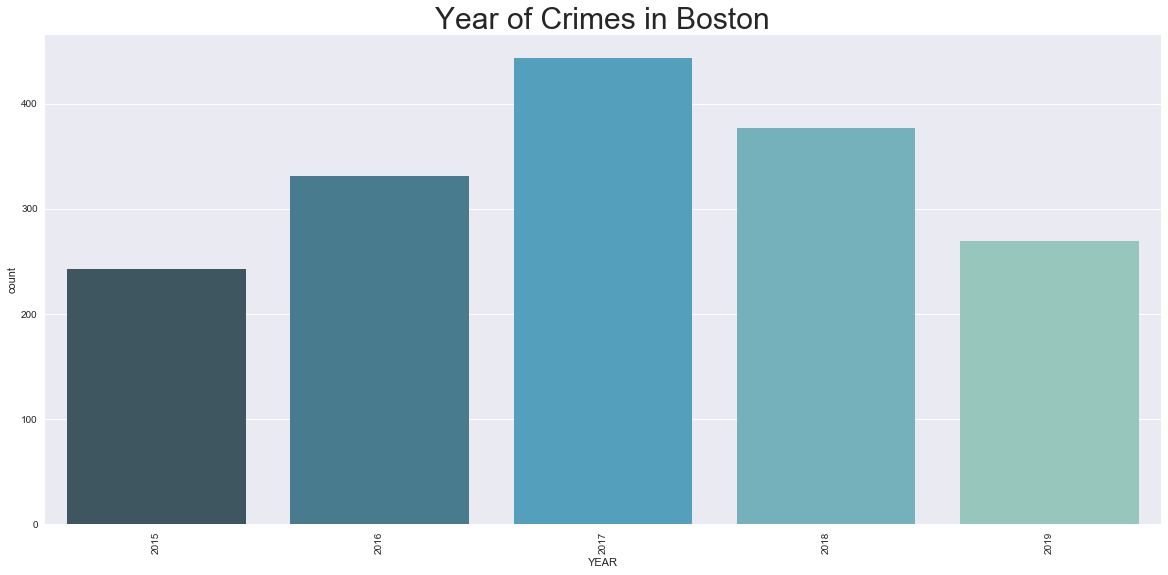

In [15]:
plt.rcParams['figure.figsize'] = (20, 9)
sns.countplot(crime_data['YEAR'], palette = 'GnBu_d')
plt.title('Year of Crimes in Boston', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

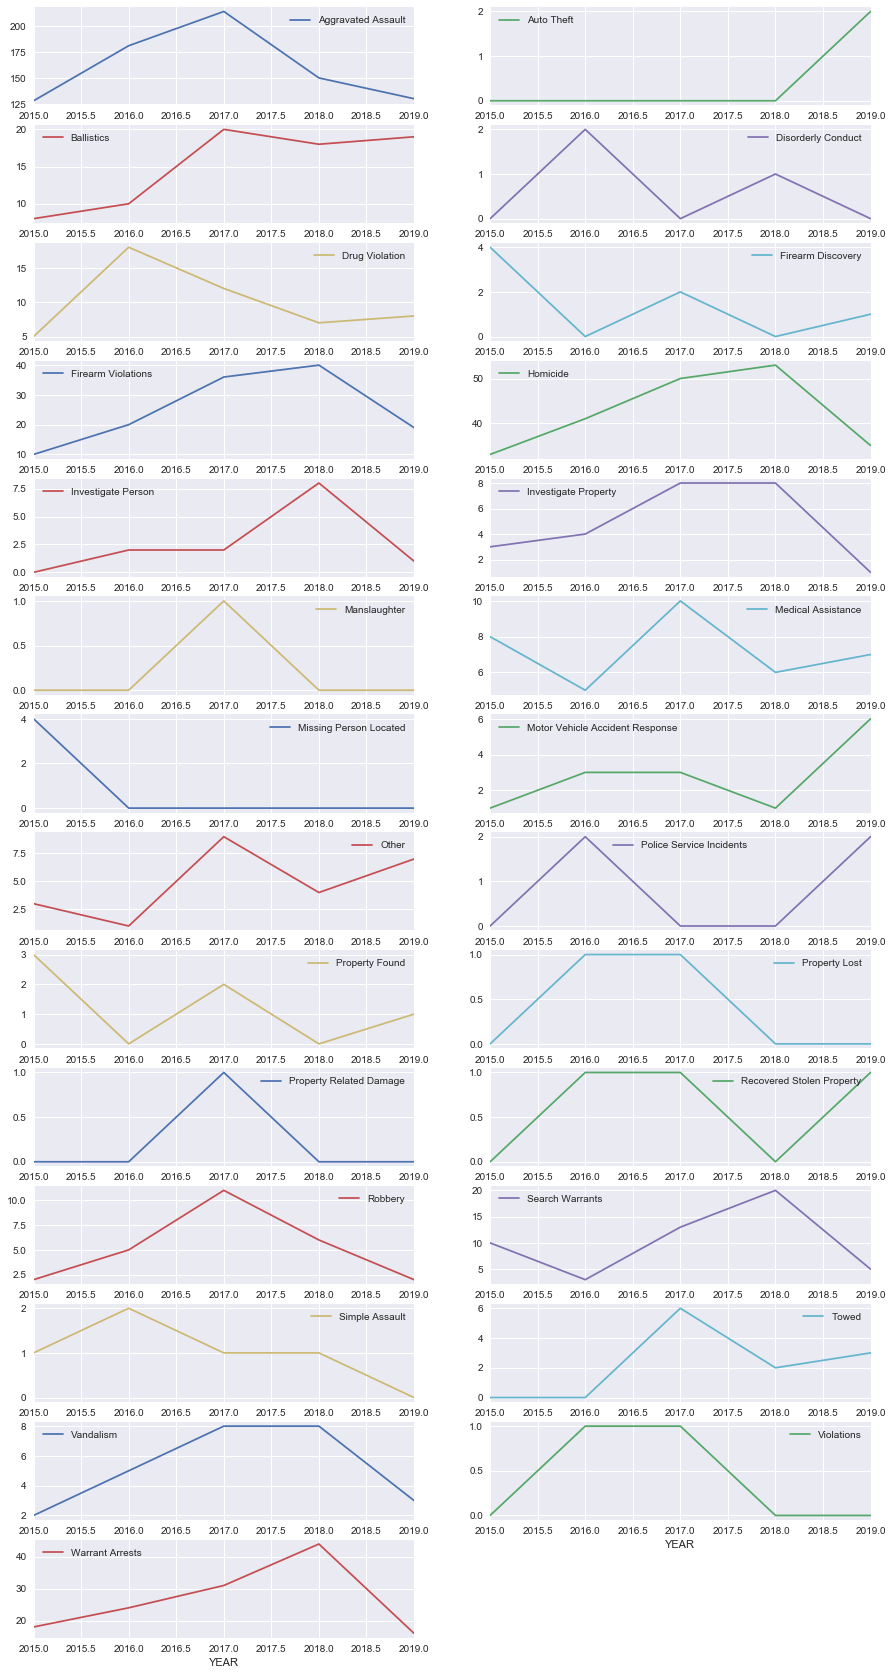

In [16]:
# crime based on the crime type through the years
crimes_count_date = crime_data.pivot_table('INCIDENT_NUMBER', aggfunc=np.size, columns='OFFENSE_CODE_GROUP', index=crime_data['YEAR'], fill_value=0)
plo_ct = crimes_count_date.plot(figsize=(15, 30), subplots=True, layout=(-1, 2), sharex=False, sharey=False)

In [17]:
# crime based on the crime type through the years in each district
crimes_count_date = crime_data.pivot_table('INCIDENT_NUMBER', aggfunc=np.size, columns=['OFFENSE_CODE_GROUP', 'DISTRICT'], index=crime_data['YEAR'], fill_value=0)
crimes_count_date.head()

OFFENSE_CODE_GROUP Aggravated Assault                                    ...  \
DISTRICT                           A1 A15 A7  B2  B3 C11 C6 D14  D4 E13  ...   
YEAR                                                                     ...   
2015                                0   1  2  53  25  19  2   1   7  11  ...   
2016                                2   1  2  69  46  32  7   2   6   9  ...   
2017                                5   1  1  60  49  43  8   1  12  17  ...   
2018                                4   1  1  54  27  32  5   3   4  11  ...   
2019                                1   2  5  49  35  20  1   0   1   8  ...   

OFFENSE_CODE_GROUP Warrant Arrests                                   
DISTRICT                        A7  B2  B3 C11 C6 D14 D4 E13 E18 E5  
YEAR                                                                 
2015                             0   7   3   1  0   2  4   0   0  1  
2016                             0  14   6   2  0   0  0   2   0  0  
2017                             0  10   4   4  2   1  3   2   3  0  
2018                             1  18  10   3  3   2  1   4   1  1  
2019                             2   6   4   1  0   0  1   2   0  0  

[5 rows x 148 columns]

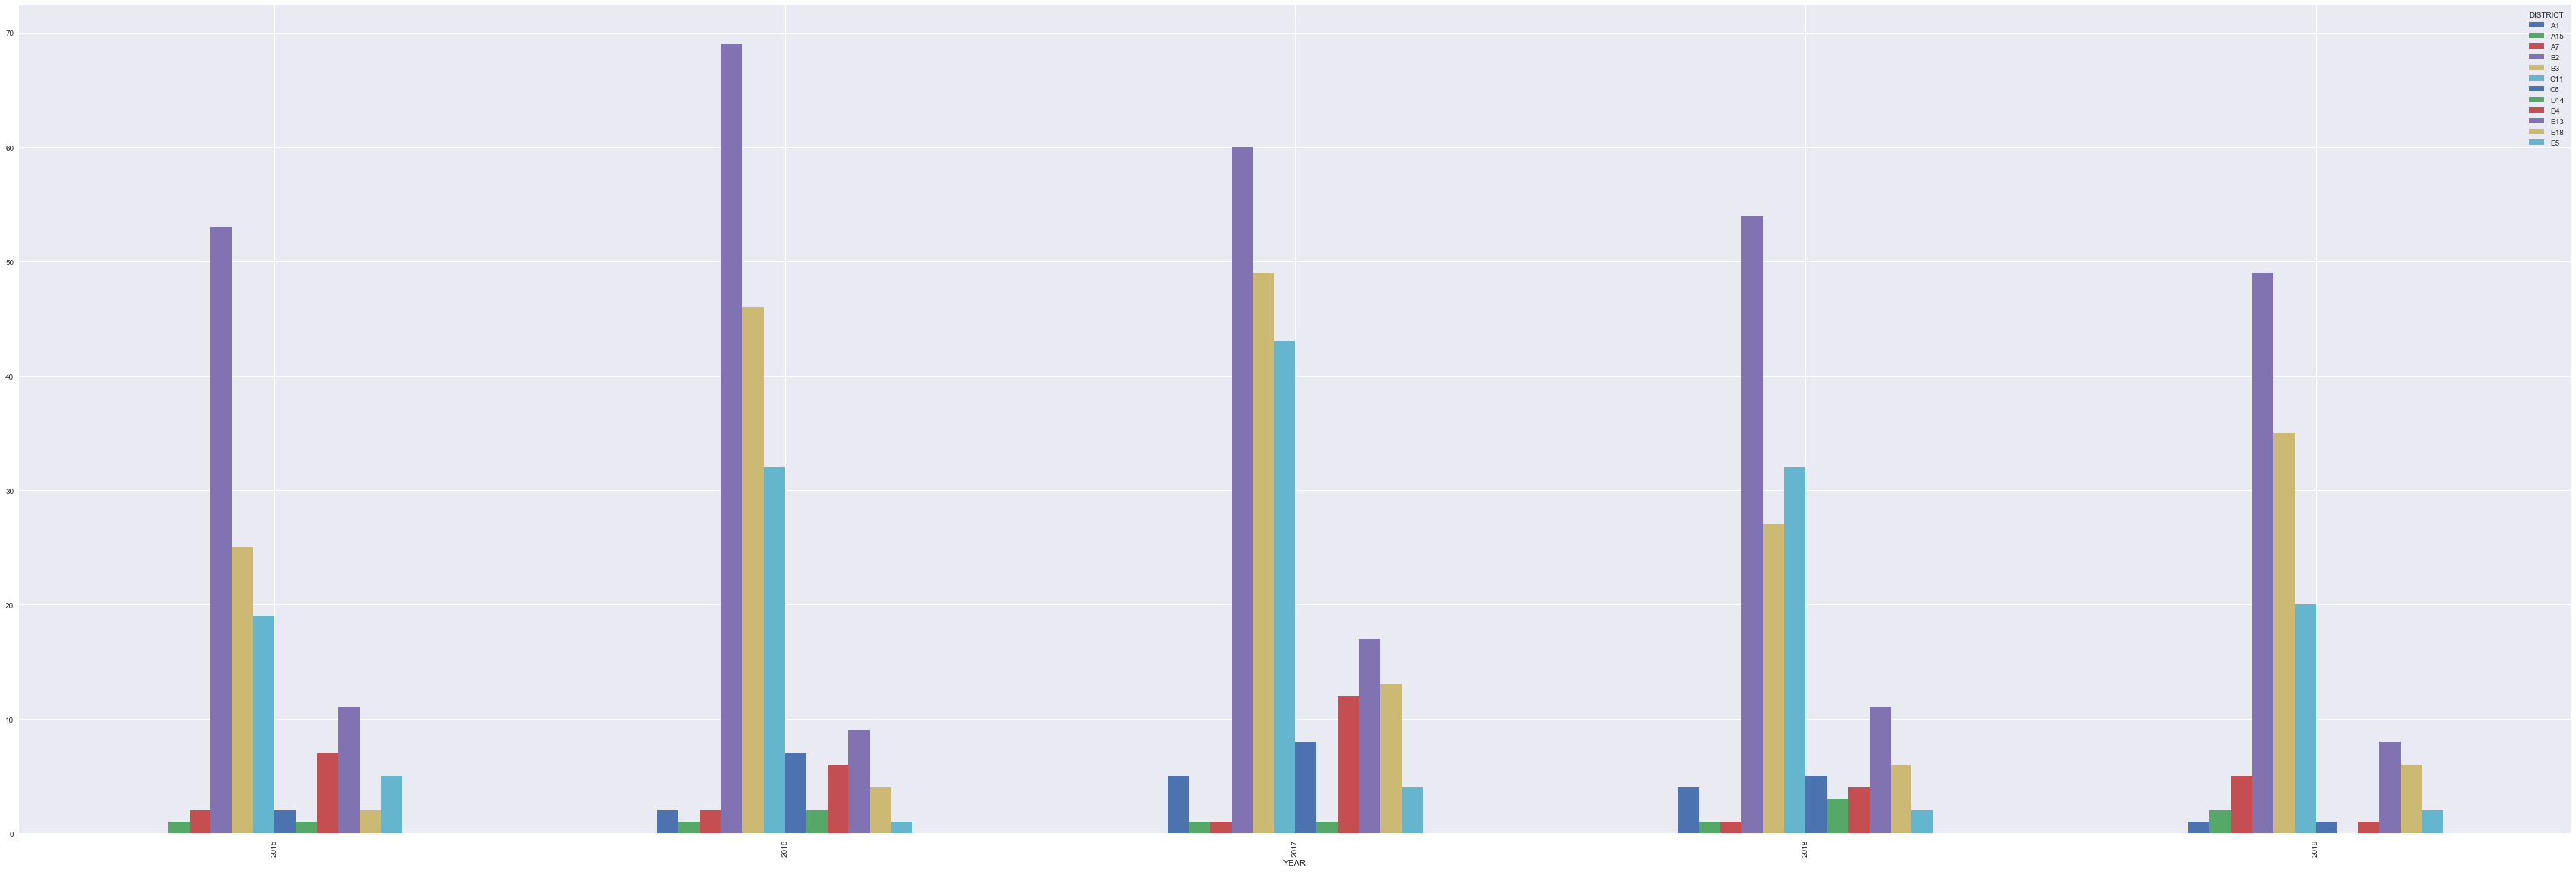

In [18]:
#Plot of Aggravated Assault throughout the years in various districts
plo_assault = crimes_count_date['Aggravated Assault'].plot(figsize=(60,20),sharex=False, sharey=False , kind='bar')

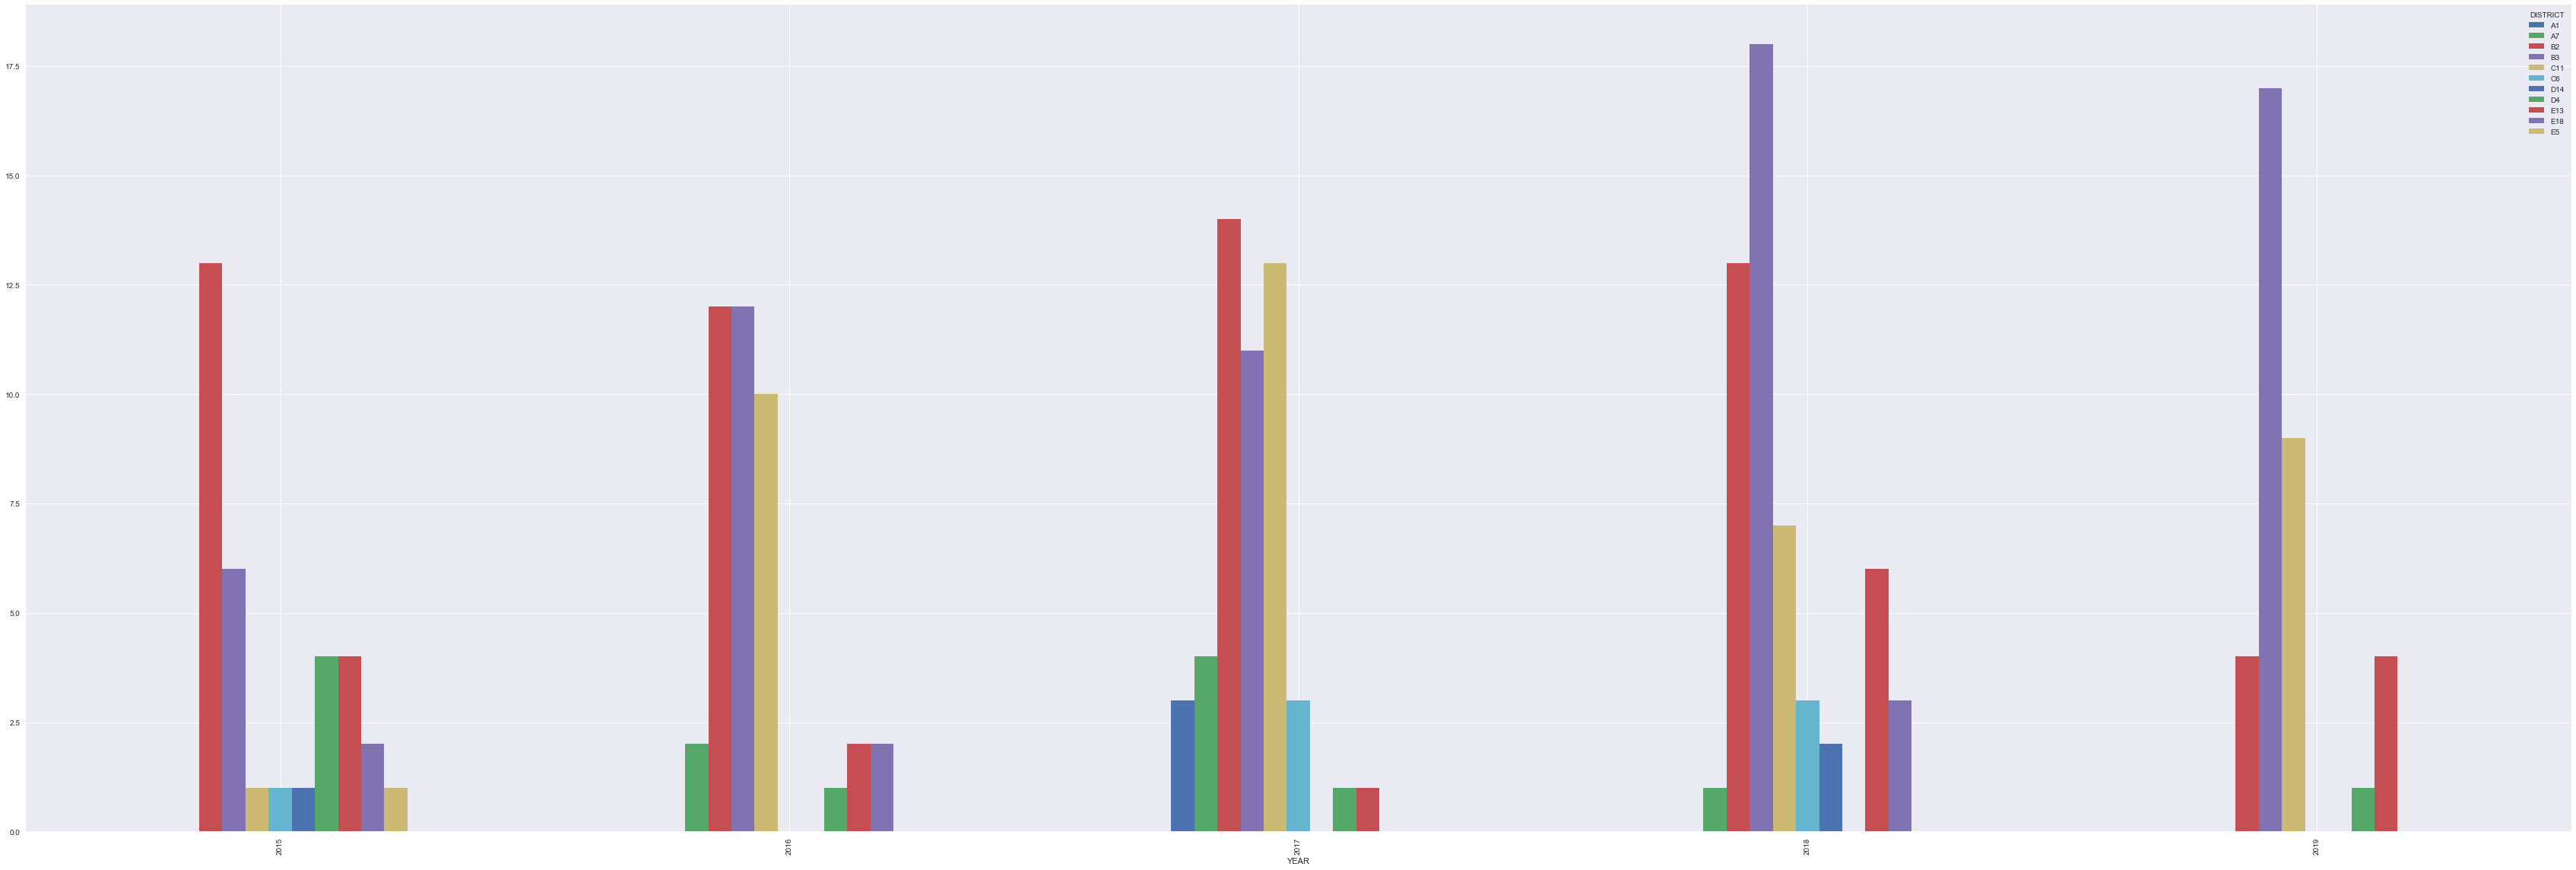

In [19]:
#Plot of Homicide throughout the years in various districts
plo_assault = crimes_count_date['Homicide'].plot(figsize=(60,20),sharex=False, sharey=False , kind='bar')

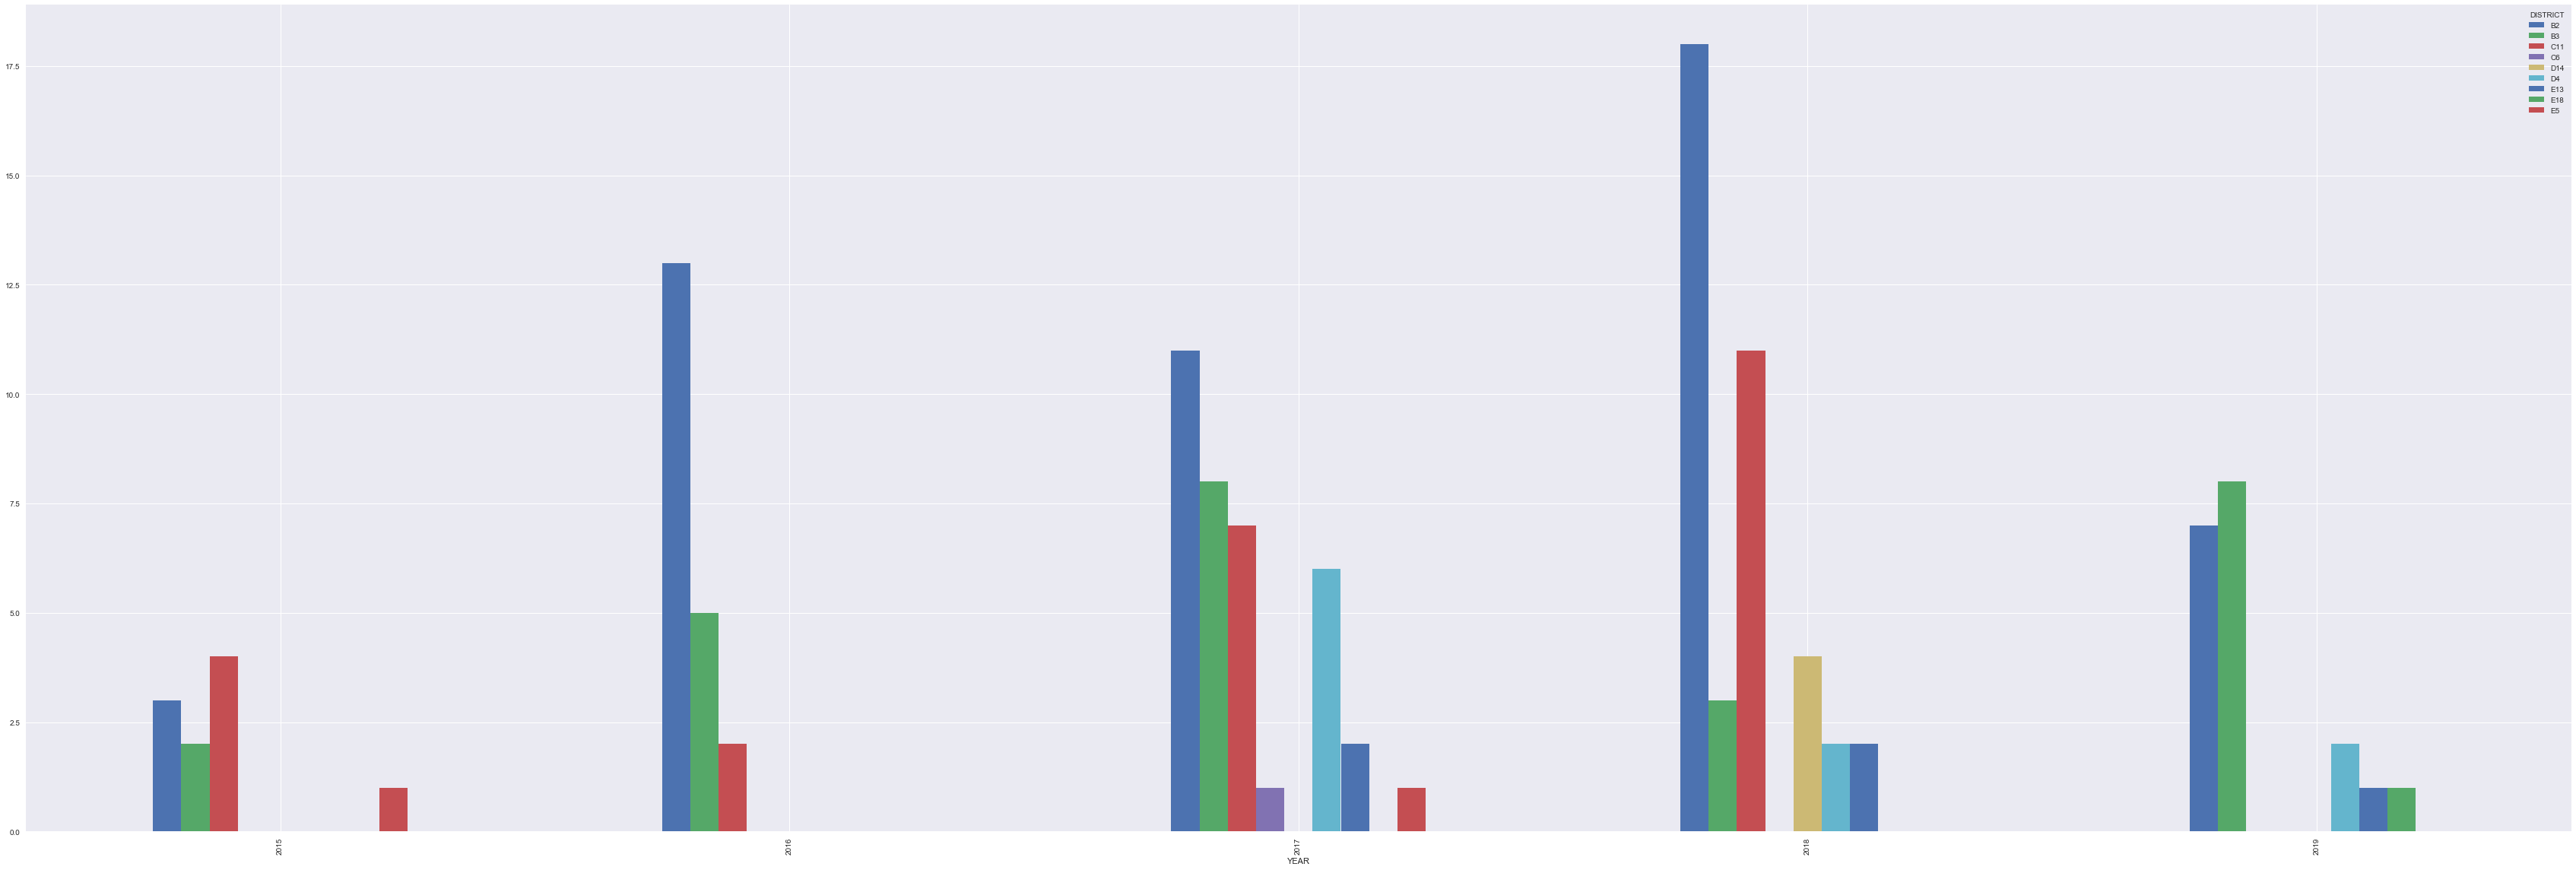

In [20]:
#Plot of Firearm Violations throughout the years in various districts
plo_assault = crimes_count_date['Firearm Violations'].plot(figsize=(60,20),sharex=False, sharey=False , kind='bar')

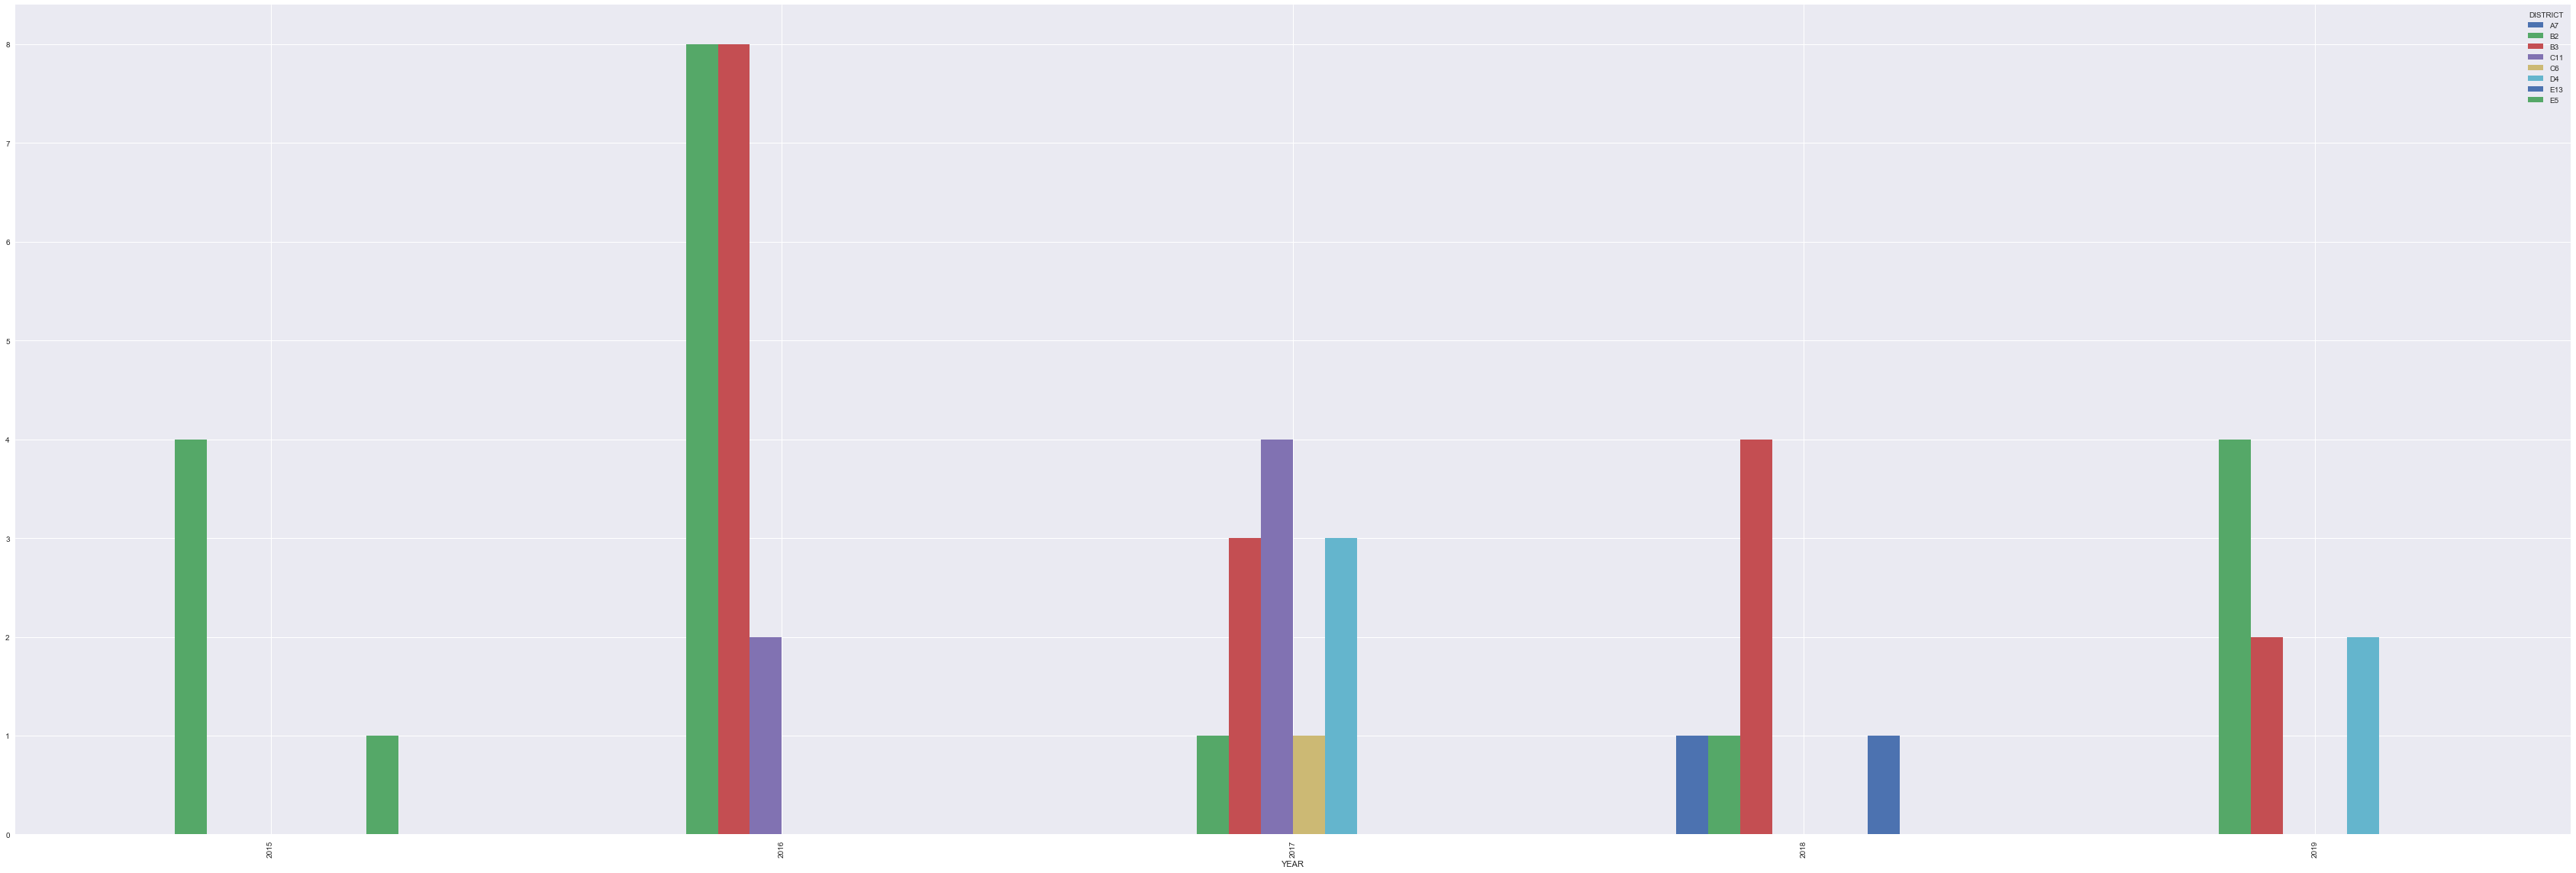

In [21]:
#Plot of Drug Violation throughout the years in various districts
plo_assault = crimes_count_date['Drug Violation'].plot(figsize=(60,20),sharex=False, sharey=False , kind='bar')

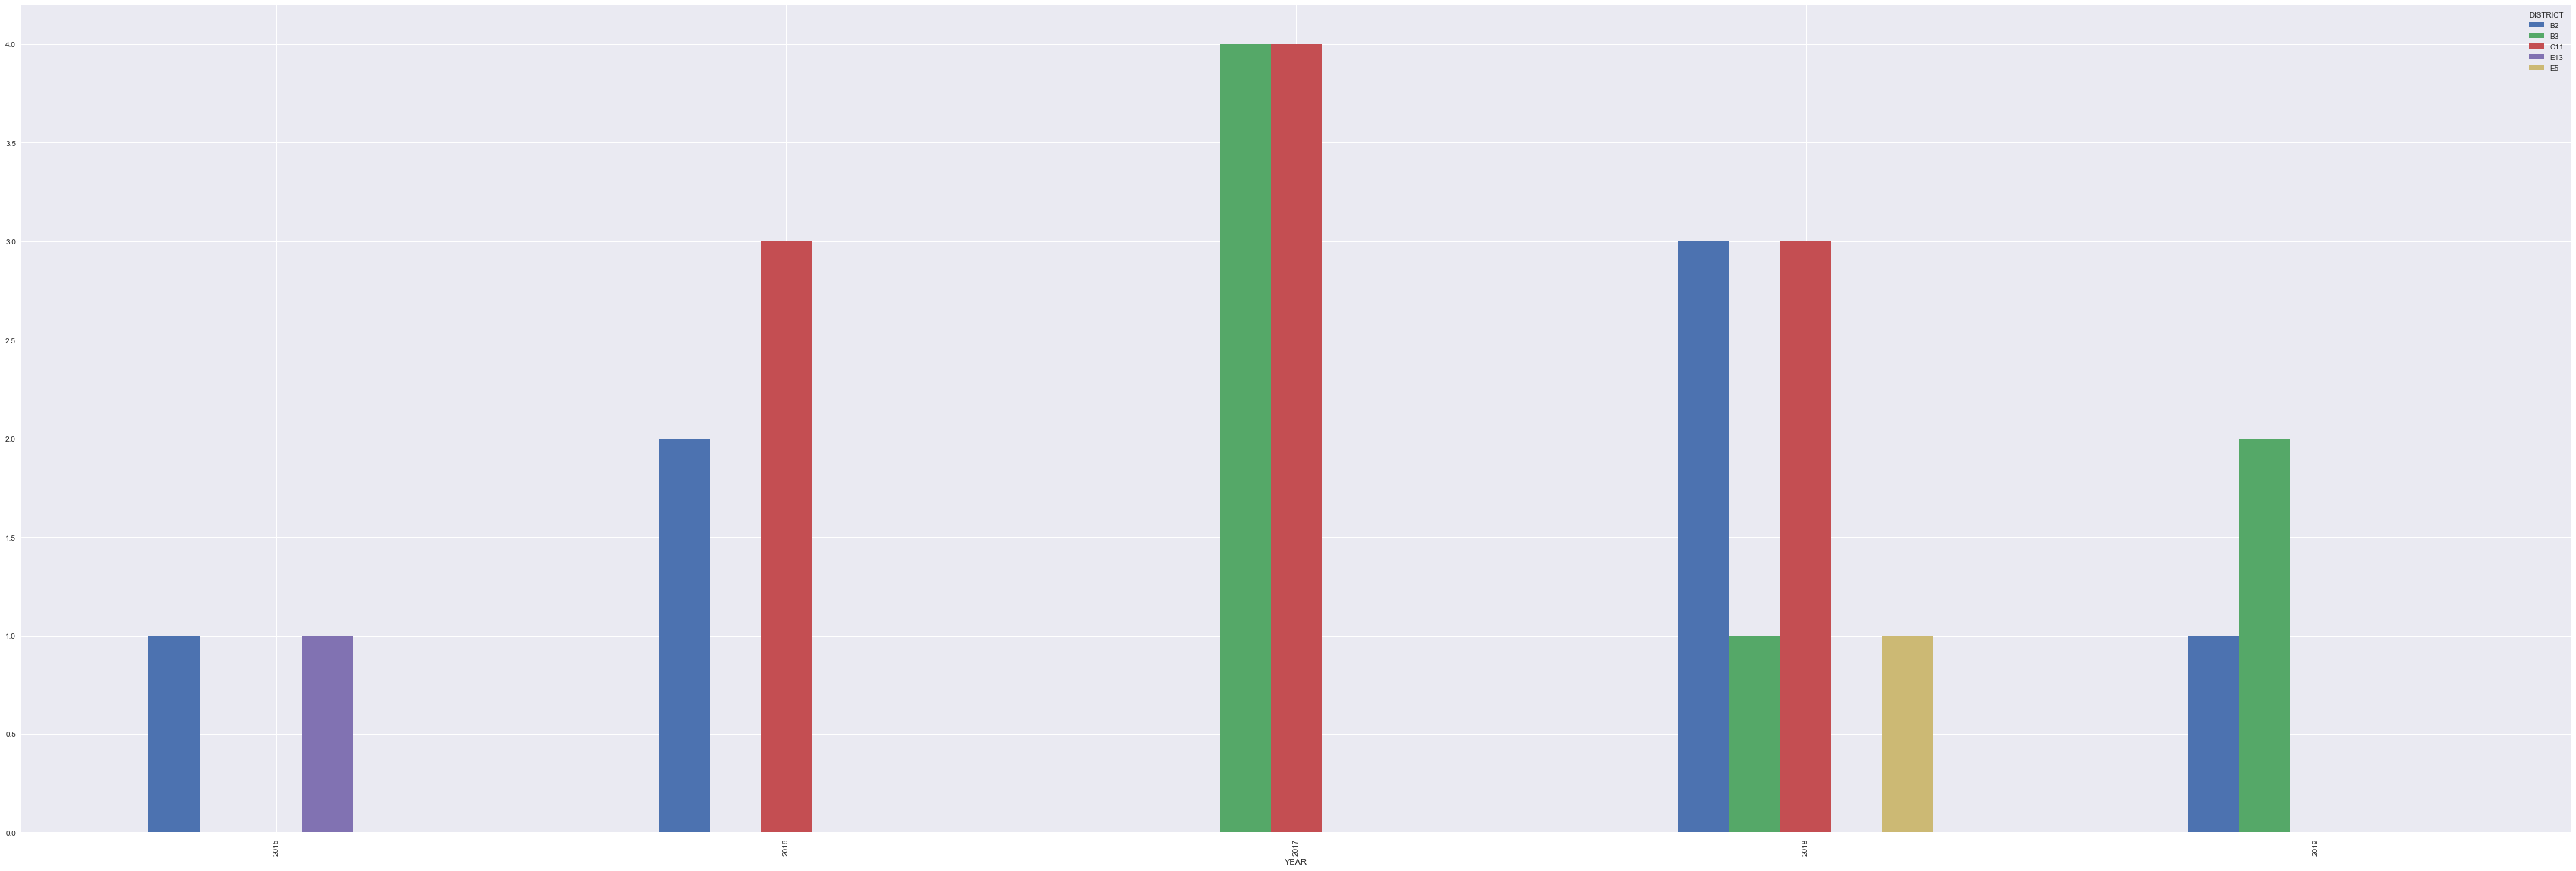

In [22]:
#Plot of Vandalism throughout the years in various districts
plo_assault = crimes_count_date['Vandalism'].plot(figsize=(60,20),sharex=False, sharey=False , kind='bar')

##  Classification - Random Forest

In [23]:
#Let us first see the different types of crimes in Boston. This information is contained in 'Offense code group' feature of the dataset
crime_data['OFFENSE_CODE_GROUP'].value_counts()

Aggravated Assault                 803
Homicide                           212
Warrant Arrests                    133
Firearm Violations                 125
Ballistics                          75
Search Warrants                     51
Drug Violation                      50
Medical Assistance                  36
Vandalism                           26
Robbery                             26
Other                               24
Investigate Property                24
Motor Vehicle Accident Response     14
Investigate Person                  13
Towed                               11
Firearm Discovery                    7
Property Found                       6
Simple Assault                       5
Police Service Incidents             4
Missing Person Located               4
Disorderly Conduct                   3
Recovered Stolen Property            3
Property Lost                        2
Auto Theft                           2
Violations                           2
Property Related Damage  

In [24]:
#There are 27 different types of crimes that are used to classify any given data under
uniquePrimaryType= crime_data['OFFENSE_CODE_GROUP'].unique()
print(uniquePrimaryType)
crime_data['OFFENSE_CODE_GROUP'].nunique()

['Aggravated Assault' 'Ballistics' 'Vandalism' 'Homicide'
 'Warrant Arrests' 'Auto Theft' 'Drug Violation' 'Firearm Violations'
 'Property Found' 'Robbery' 'Police Service Incidents' 'Other'
 'Motor Vehicle Accident Response' 'Towed' 'Firearm Discovery'
 'Medical Assistance' 'Search Warrants' 'Recovered Stolen Property'
 'Investigate Person' 'Investigate Property' 'Simple Assault'
 'Disorderly Conduct' 'Property Lost' 'Violations' 'Manslaughter'
 'Property Related Damage' 'Missing Person Located']


27

In [25]:
#Using a copy of the datset to manipulate the values for classification
rfboston = crime_data.copy(deep=True)

In [26]:
rfboston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 876 to 426308
Data columns (total 17 columns):
INCIDENT_NUMBER        1663 non-null object
OFFENSE_CODE           1663 non-null int64
OFFENSE_CODE_GROUP     1663 non-null object
OFFENSE_DESCRIPTION    1663 non-null object
DISTRICT               1663 non-null object
REPORTING_AREA         1663 non-null object
SHOOTING               1663 non-null object
OCCURRED_ON_DATE       1663 non-null datetime64[ns]
YEAR                   1663 non-null int64
MONTH                  1663 non-null int64
DAY_OF_WEEK            1663 non-null object
HOUR                   1663 non-null int64
UCR_PART               1663 non-null object
STREET                 1663 non-null object
Lat                    1663 non-null float64
Long                   1663 non-null float64
Location               1663 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(10)
memory usage: 233.9+ KB


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [28]:
#Creating the dependent variable class
factor = pd.factorize(rfboston['OFFENSE_CODE_GROUP'])
rfboston.species = factor[0]
definitions = factor[1]
print(rfboston.species)
print(definitions)

[0 1 0 ... 0 0 0]
Index(['Aggravated Assault', 'Ballistics', 'Vandalism', 'Homicide',
       'Warrant Arrests', 'Auto Theft', 'Drug Violation', 'Firearm Violations',
       'Property Found', 'Robbery', 'Police Service Incidents', 'Other',
       'Motor Vehicle Accident Response', 'Towed', 'Firearm Discovery',
       'Medical Assistance', 'Search Warrants', 'Recovered Stolen Property',
       'Investigate Person', 'Investigate Property', 'Simple Assault',
       'Disorderly Conduct', 'Property Lost', 'Violations', 'Manslaughter',
       'Property Related Damage', 'Missing Person Located'],
      dtype='object')


C:\Users\bhavs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
rfboston['OFFENSE_CODE'] = le.fit_transform(rfboston['OFFENSE_CODE'])

In [30]:
rfboston.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
876,I192077645,7,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,295,Y,2019-09-26 02:38:00,2019,9,Thursday,2,Part One,DABNEY ST,42.324098,-71.084830,"(42.32409762, -71.08483043)"
877,I192077645,32,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,295,Y,2019-09-26 02:38:00,2019,9,Thursday,2,Part Two,DABNEY ST,42.324098,-71.084830,"(42.32409762, -71.08483043)"
889,I192077627,7,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,344,Y,2019-09-25 23:42:00,2019,9,Wednesday,23,Part One,WESTVILLE TER,42.300980,-71.068699,"(42.30098009, -71.06869928)"
2785,I192075578,7,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B3,457,Y,2019-09-19 17:16:00,2019,9,Thursday,17,Part One,FOWLER ST,42.300068,-71.083369,"(42.30006755, -71.08336910)"
3408,I192074923,7,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,326,Y,2019-09-17 22:35:00,2019,9,Tuesday,22,Part One,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)"


In [31]:
rfboston.head() # 2 7,,,, #DEPENDENT 1

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
876,I192077645,7,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,295,Y,2019-09-26 02:38:00,2019,9,Thursday,2,Part One,DABNEY ST,42.324098,-71.084830,"(42.32409762, -71.08483043)"
877,I192077645,32,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,295,Y,2019-09-26 02:38:00,2019,9,Thursday,2,Part Two,DABNEY ST,42.324098,-71.084830,"(42.32409762, -71.08483043)"
889,I192077627,7,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,344,Y,2019-09-25 23:42:00,2019,9,Wednesday,23,Part One,WESTVILLE TER,42.300980,-71.068699,"(42.30098009, -71.06869928)"
2785,I192075578,7,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B3,457,Y,2019-09-19 17:16:00,2019,9,Thursday,17,Part One,FOWLER ST,42.300068,-71.083369,"(42.30006755, -71.08336910)"
3408,I192074923,7,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,326,Y,2019-09-17 22:35:00,2019,9,Tuesday,22,Part One,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)"


In [32]:
crime_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
876,I192077645,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,295,Y,2019-09-26 02:38:00,2019,9,Thursday,2,Part One,DABNEY ST,42.324098,-71.084830,"(42.32409762, -71.08483043)"
877,I192077645,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,295,Y,2019-09-26 02:38:00,2019,9,Thursday,2,Part Two,DABNEY ST,42.324098,-71.084830,"(42.32409762, -71.08483043)"
889,I192077627,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,C11,344,Y,2019-09-25 23:42:00,2019,9,Wednesday,23,Part One,WESTVILLE TER,42.300980,-71.068699,"(42.30098009, -71.06869928)"
2785,I192075578,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B3,457,Y,2019-09-19 17:16:00,2019,9,Thursday,17,Part One,FOWLER ST,42.300068,-71.083369,"(42.30006755, -71.08336910)"
3408,I192074923,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,326,Y,2019-09-17 22:35:00,2019,9,Tuesday,22,Part One,CRESTON ST,42.311955,-71.078719,"(42.31195475, -71.07871912)"


In [33]:
rfboston['OFFENSE_CODE_GROUP'] = le.fit_transform(rfboston['OFFENSE_CODE_GROUP'])
rfboston['OFFENSE_DESCRIPTION'] = le.fit_transform(rfboston['OFFENSE_DESCRIPTION'])
rfboston['DISTRICT'] = le.fit_transform(rfboston['DISTRICT'])
rfboston['INCIDENT_NUMBER'] = le.fit_transform(rfboston['INCIDENT_NUMBER'])
rfboston['UCR_PART'] = le.fit_transform(rfboston['UCR_PART'])
rfboston['SHOOTING'] = le.fit_transform(rfboston['SHOOTING'])
rfboston['OCCURRED_ON_DATE'] = le.fit_transform(rfboston['OCCURRED_ON_DATE'])

In [34]:
rfboston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 876 to 426308
Data columns (total 17 columns):
INCIDENT_NUMBER        1663 non-null int32
OFFENSE_CODE           1663 non-null int64
OFFENSE_CODE_GROUP     1663 non-null int32
OFFENSE_DESCRIPTION    1663 non-null int32
DISTRICT               1663 non-null int32
REPORTING_AREA         1663 non-null object
SHOOTING               1663 non-null int32
OCCURRED_ON_DATE       1663 non-null int64
YEAR                   1663 non-null int64
MONTH                  1663 non-null int64
DAY_OF_WEEK            1663 non-null object
HOUR                   1663 non-null int64
UCR_PART               1663 non-null int32
STREET                 1663 non-null object
Lat                    1663 non-null float64
Long                   1663 non-null float64
Location               1663 non-null object
dtypes: float64(2), int32(6), int64(5), object(4)
memory usage: 194.9+ KB


### Random Forest with Offense_Code

In [35]:
#Splitting the data into independent and dependent variables
X = rfboston.iloc[:,lambda df: [0,1,3,4,5,6,7,12]].values
y = rfboston.iloc[:,2].values
print('The independent features set: ')
print(X[:5,:])
print('The dependent variable: ')
print(y[:5]) 

The independent features set: 
[[783 7 3 3 '295' 0 782 1]
 [783 32 6 3 '295' 0 782 3]
 [782 7 3 5 '344' 0 781 1]
 [781 7 3 4 '457' 0 780 1]
 [780 7 3 3 '326' 0 779 1]]
The dependent variable: 
[0 2 0 0 0]


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)


In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [39]:
# Predicting the Test set results
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("The accuracy for the above model is = ", accuracy)

The accuracy for the above model is =  0.9783653846153846


In [40]:
#Using scikit confusion_matrix method to determine the confusion matrix for our model
#Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix
from sklearn.metrics import confusion_matrix
print("Below is the confusion matrix for the above model")
CM = confusion_matrix(y_test, y_pred)
print(CM)

Below is the confusion matrix for the above model
[[199   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0  18   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0  16   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0  32   0   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0  57   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   5   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   4   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
   

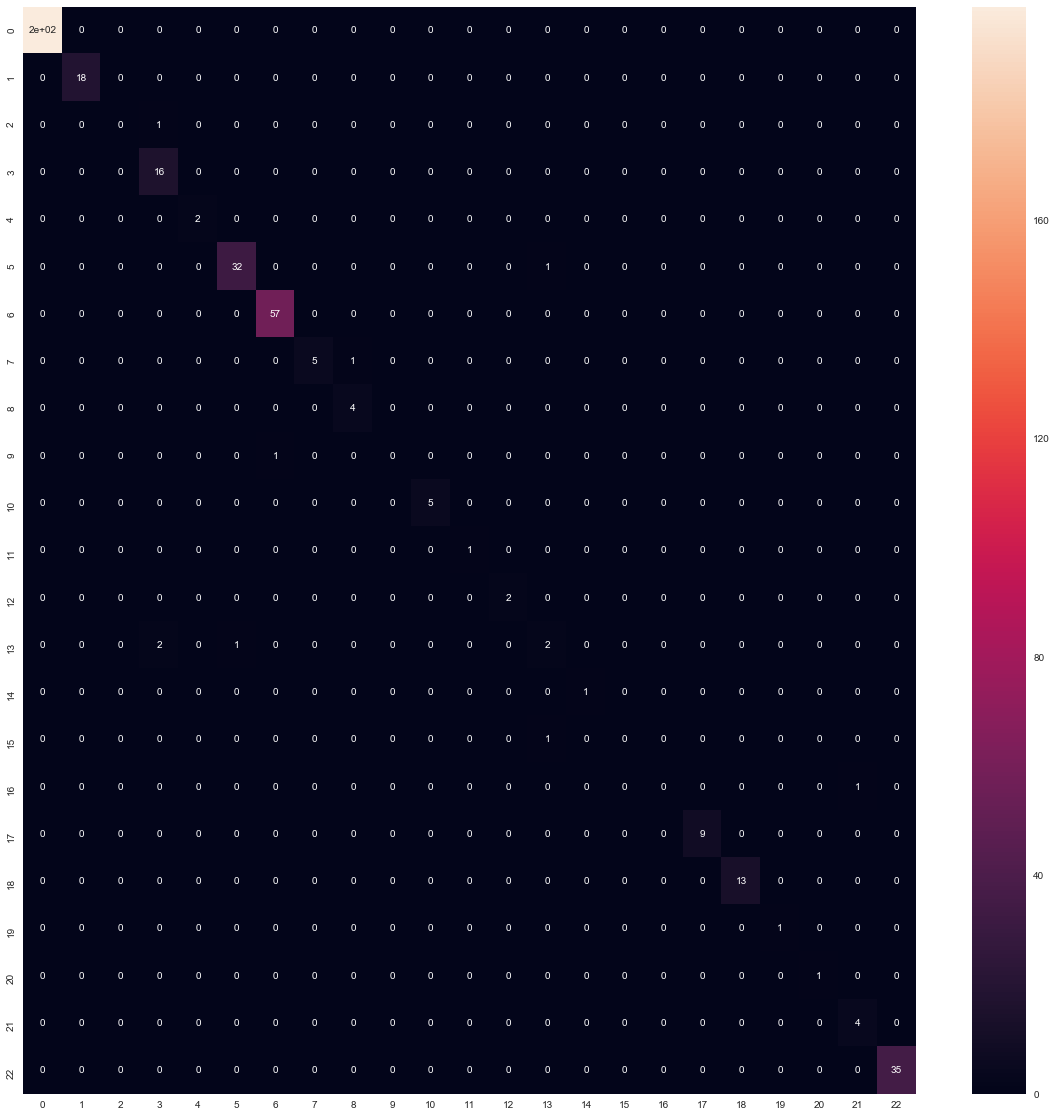

In [41]:
df_cm = pd.DataFrame(CM, index = [i for i in range(23)],
                  columns = [i for i in range(23)])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

### Random Forest without Offense_Code

In [42]:
#Splitting the data into independent and dependent variables
X_2 = rfboston.iloc[:,lambda df: [0,3,4,5,6,7,12]].values
y_2 = rfboston.iloc[:,2].values
print('The independent features set: ')
print(X_2[:5,:])
print('The dependent variable: ')
print(y_2[:5]) 

The independent features set: 
[[783 3 3 '295' 0 782 1]
 [783 6 3 '295' 0 782 3]
 [782 3 5 '344' 0 781 1]
 [781 3 4 '457' 0 780 1]
 [780 3 3 '326' 0 779 1]]
The dependent variable: 
[0 2 0 0 0]


In [43]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size = 0.25, random_state = 21)

In [44]:
scaler = StandardScaler()
X_2_train = scaler.fit_transform(X_2_train)
X_2_test = scaler.transform(X_2_test)

In [45]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_2_train, y_2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [46]:
# Predicting the Test set results
from sklearn.metrics import accuracy_score
y_2_pred = classifier.predict(X_2_test)

accuracy = accuracy_score(y_2_test, y_2_pred)
print("The accuracy for the above model is = ", accuracy)

The accuracy for the above model is =  0.9567307692307693


In [47]:
#Using scikit confusion_matrix method to determine the confusion matrix for our model
#Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix
#from sklearn.metrics import confusion_matrix
print("Below is the confusion matrix for the above model")
CM2 = confusion_matrix(y_2_test, y_2_pred)
print(CM2)

Below is the confusion matrix for the above model
[[199   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0  18   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   2   0  14   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0  33   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0  57   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   5   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   4   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
   

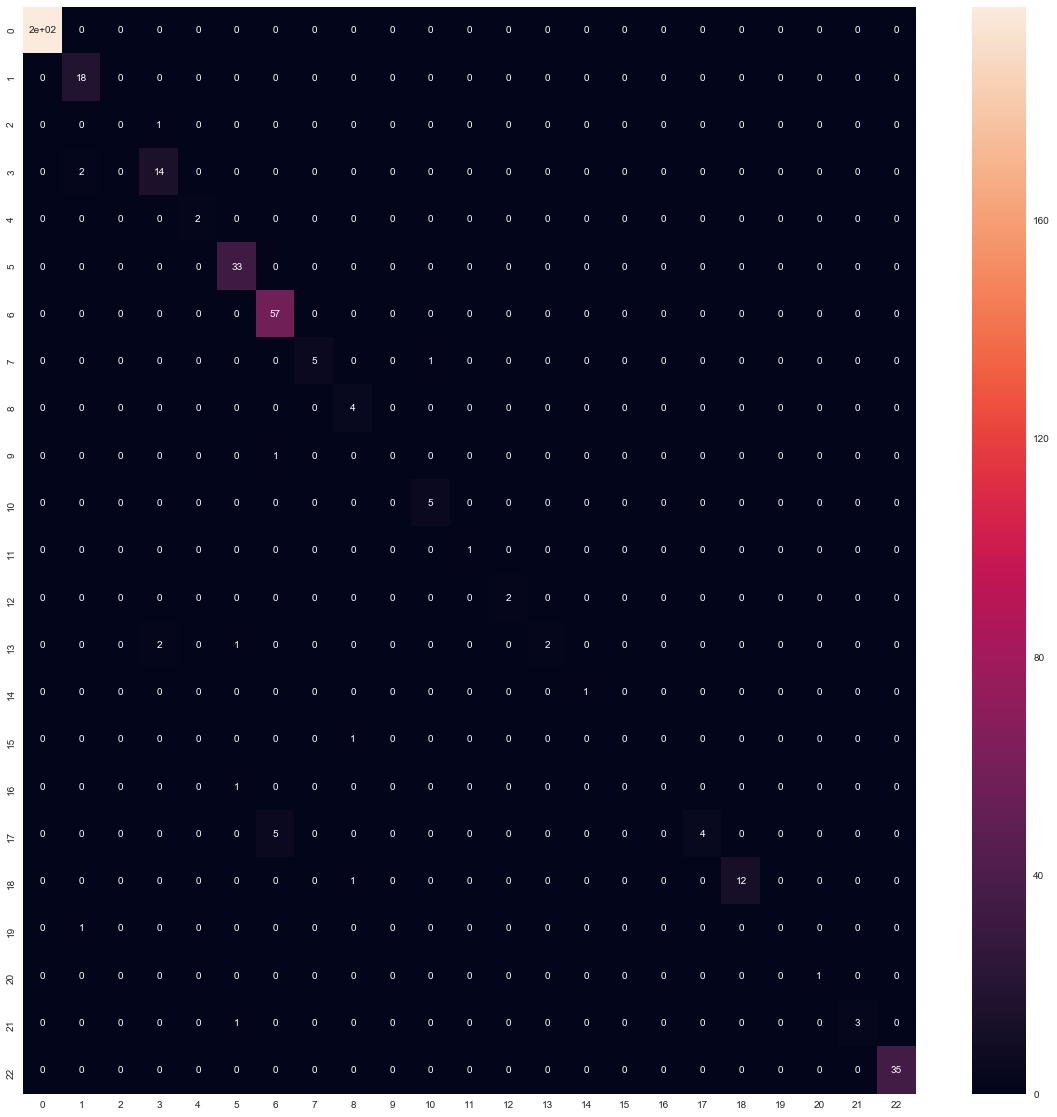

In [48]:
df_cm2 = pd.DataFrame(CM2, index = [i for i in range(23)],
                  columns = [i for i in range(23)])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm2, annot=True)

### Random Forest 3 : Dataset without the Offense_code and Offense_Description

In [49]:
#Splitting the data into independent and dependent variables
X_3 = rfboston.iloc[:,lambda df: [0,4,5,6,7,12]].values
y_3 = rfboston.iloc[:,2].values
print('The independent features set: ')
print(X_3[:5,:])
print('The dependent variable: ')
print(y_3[:5]) 

The independent features set: 
[[783 3 '295' 0 782 1]
 [783 3 '295' 0 782 3]
 [782 5 '344' 0 781 1]
 [781 4 '457' 0 780 1]
 [780 3 '326' 0 779 1]]
The dependent variable: 
[0 2 0 0 0]


In [50]:
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size = 0.25, random_state = 21)

In [51]:
# Feature Scaling
scaler = StandardScaler()
X_3_train = scaler.fit_transform(X_3_train)
X_3_test = scaler.transform(X_3_test)

In [52]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_3_train, y_3_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [53]:
# Predicting the Test set results
from sklearn.metrics import accuracy_score
y_3_pred = classifier.predict(X_3_test)

accuracy = accuracy_score(y_3_test, y_3_pred)
print("The accuracy for the above model is = ", accuracy)

The accuracy for the above model is =  0.6105769230769231


#### Metrics for Random forest model

1. F1 Score

In [54]:
from sklearn.metrics import f1_score
f1_score(y_2_test, y_2_pred, average='weighted')

C:\Users\bhavs\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9481022485736115

2. Root Mean Squared Error

In [55]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_2_test, y_2_pred))
rms

2.318922992717491

## Time Series Model

In [56]:
crime_data['Date Only'] = crime_data['OCCURRED_ON_DATE'].dt.date
#timeSeries = chi.groupby('Date').count()

In [57]:
timeSeries = crime_data.groupby('Date Only').count()['OFFENSE_CODE_GROUP'].to_frame()
timeSeries.reset_index(inplace=True)
timeSeries.columns = ['ds','y']
timeSeries.head()

,ds,y
0,2015-06-16,3
1,2015-06-19,1
2,2015-06-20,5
3,2015-06-24,1
4,2015-06-25,1


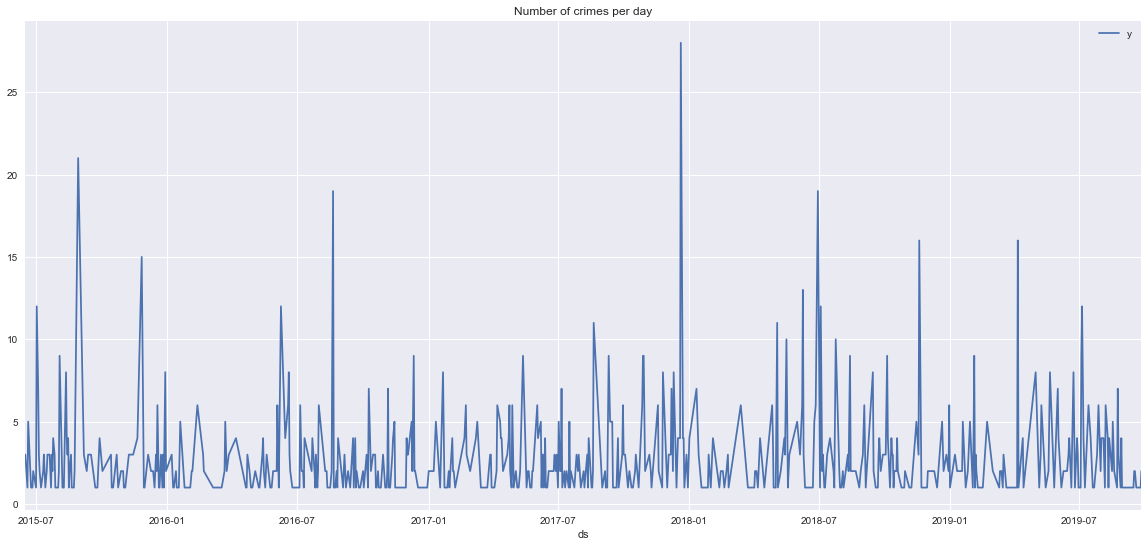

In [58]:
timeSeries.plot(x='ds', title='Number of crimes per day')
plt.show()

In [59]:
prophet_ds = timeSeries.copy()

In [60]:
prophet_ds.head()

,ds,y
0,2015-06-16,3
1,2015-06-19,1
2,2015-06-20,5
3,2015-06-24,1
4,2015-06-25,1


In [61]:
from fbprophet import Prophet

# Prophet code are basically these lines
prophet_model = Prophet()
prophet_model.fit(prophet_ds)

# Let's try a forecast for 365 days
future = prophet_model.make_future_dataframe(periods=365)
forecast_df = prophet_model.predict(future)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


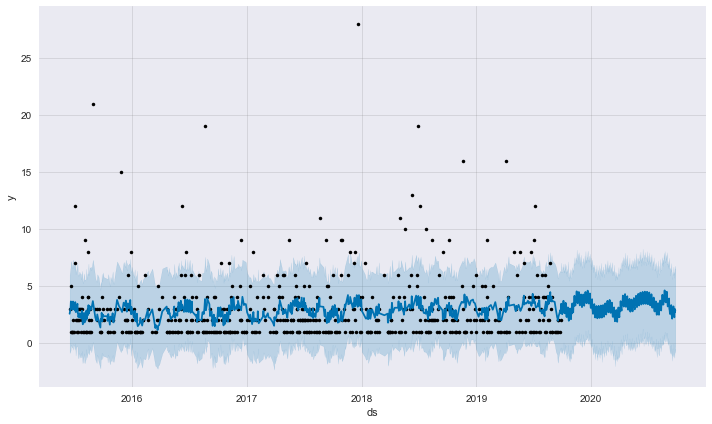

In [62]:
ts_plot = prophet_model.plot(forecast_df)

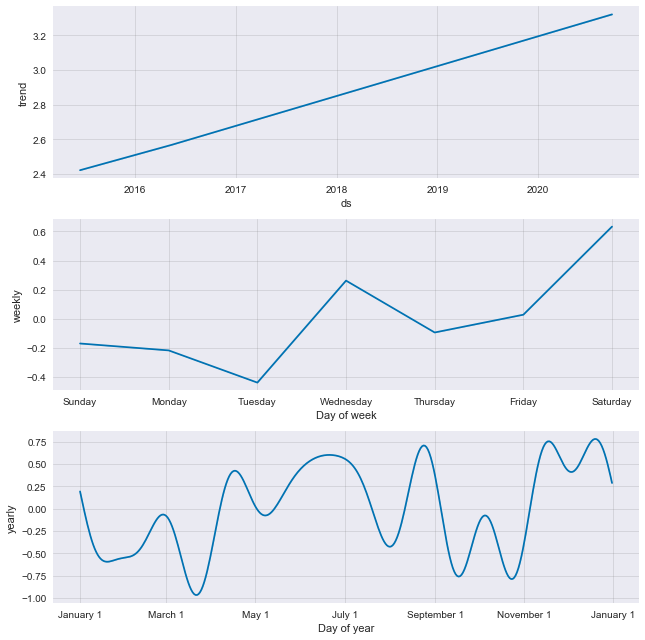

In [63]:
PC = prophet_model.plot_components(forecast_df)


In [64]:
#filtering out the arson from other crime types and then applying time series model
assault = crime_data[crime_data['OFFENSE_CODE_GROUP'] == 'Aggravated Assault']
assault['Date Only'] = assault['OCCURRED_ON_DATE'].dt.date

C:\Users\bhavs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


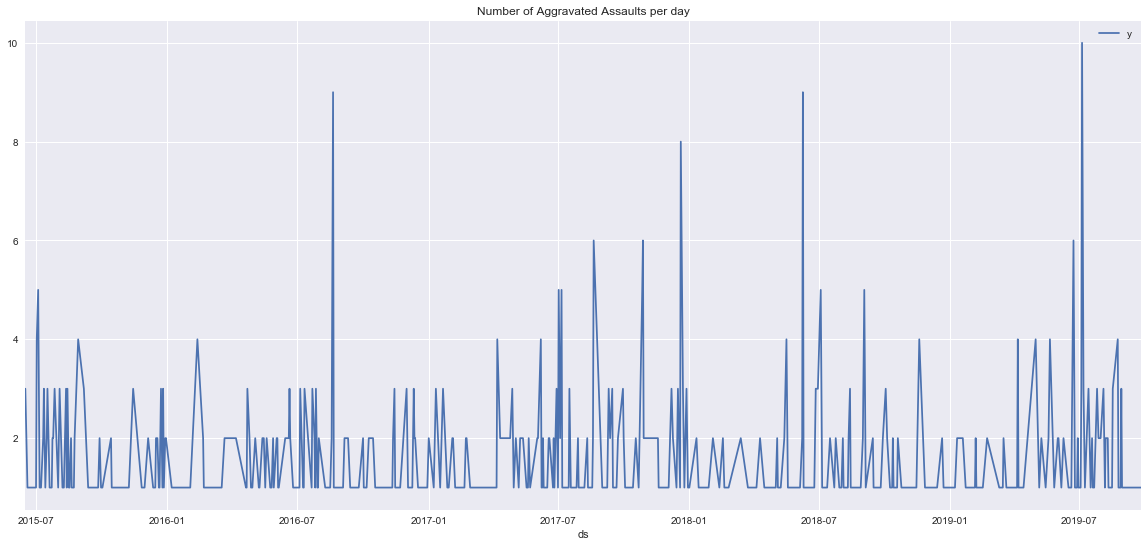

In [65]:
ts_assault = assault.groupby('Date Only').count()['OFFENSE_CODE_GROUP'].to_frame()
ts_assault.reset_index(inplace=True)
ts_assault.columns = ['ds','y']
ts_assault.plot(x='ds', title='Number of Aggravated Assaults per day')
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


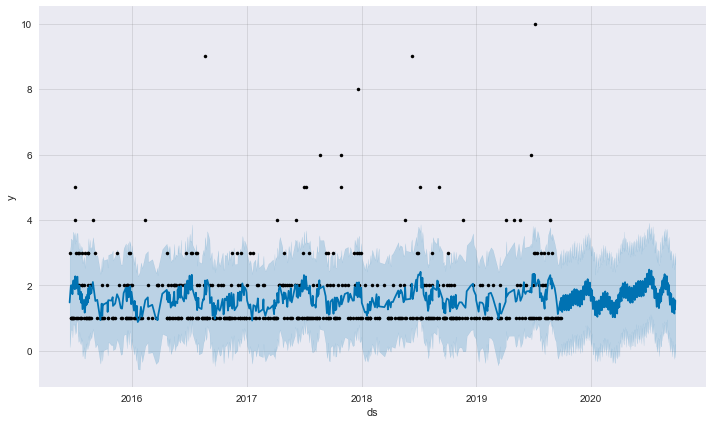

In [66]:
prophet_assault = ts_assault.copy()
prophet_model = Prophet()
prophet_model.fit(prophet_assault)

# Let's try a forecast for 365 days
future = prophet_model.make_future_dataframe(periods=365)
forecast_df = prophet_model.predict(future)
ts_assault = prophet_model.plot(forecast_df)

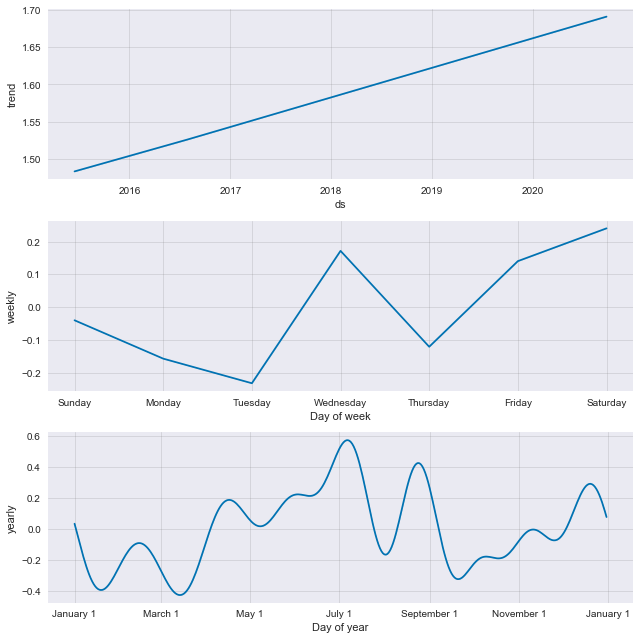

In [67]:
PC = prophet_model.plot_components(forecast_df)

C:\Users\bhavs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


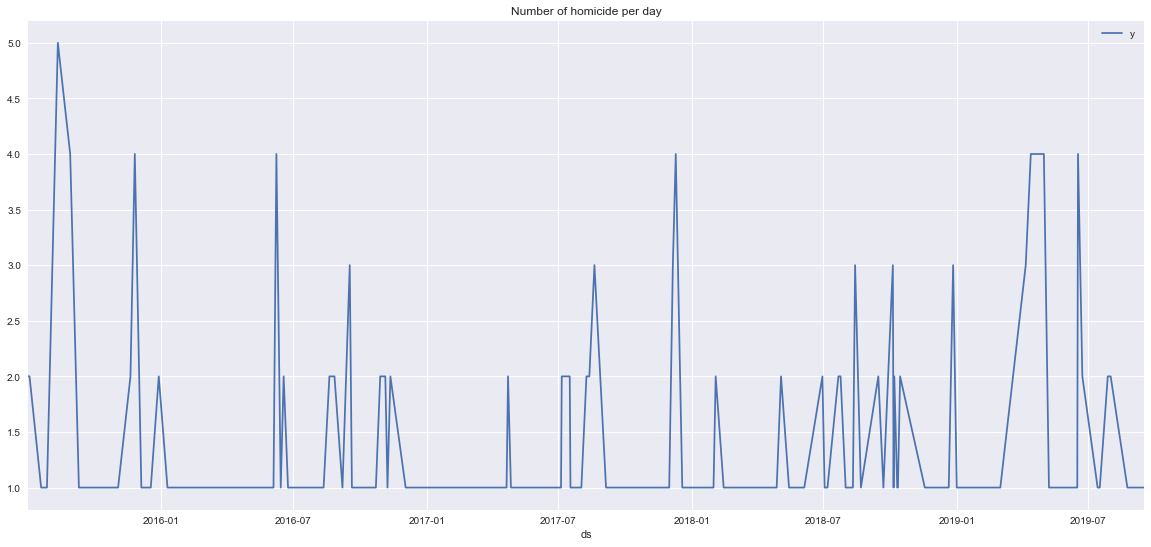

In [68]:
#filtering out the assault from other crime types and then applying time series model
homicide = crime_data[crime_data['OFFENSE_CODE_GROUP'] == 'Homicide']
homicide['Date Only'] = homicide['OCCURRED_ON_DATE'].dt.date
ts_homicide = homicide.groupby('Date Only').count()['OFFENSE_CODE_GROUP'].to_frame()
ts_homicide.reset_index(inplace=True)
ts_homicide.columns = ['ds','y']
ts_homicide.plot(x='ds', title='Number of homicide per day')
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


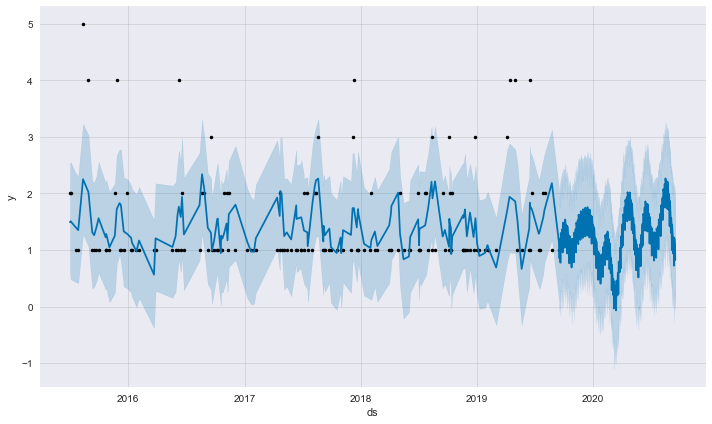

In [69]:
prophet_homicide = ts_homicide.copy()
prophet_model = Prophet()
prophet_model.fit(prophet_homicide)

# Let's try a forecast for 365 days
future = prophet_model.make_future_dataframe(periods=365)
forecast_df = prophet_model.predict(future)
ts_assault = prophet_model.plot(forecast_df)

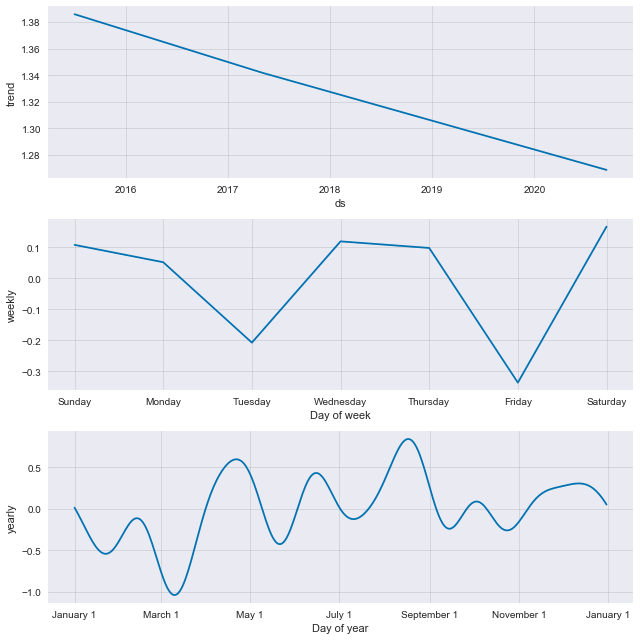

In [70]:
PC = prophet_model.plot_components(forecast_df)

C:\Users\bhavs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


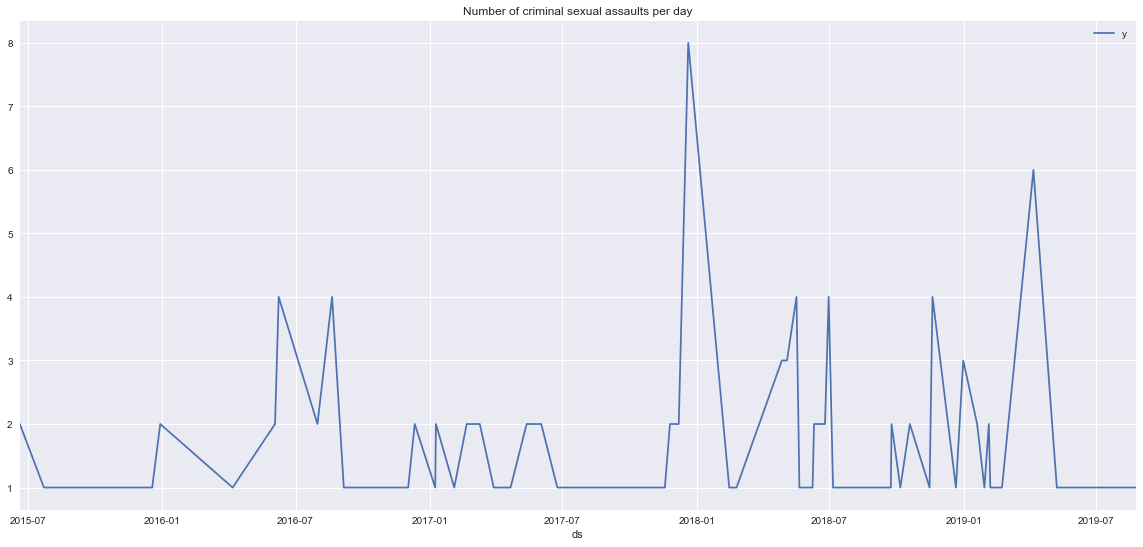

In [71]:
#filtering out the criminal sexual assault from other crime types and then applying time series model
firearm_violations = crime_data[crime_data['OFFENSE_CODE_GROUP'] == 'Firearm Violations']
firearm_violations['Date Only'] = firearm_violations['OCCURRED_ON_DATE'].dt.date
ts_firearm_violations = firearm_violations.groupby('Date Only').count()['OFFENSE_CODE_GROUP'].to_frame()
ts_firearm_violations.reset_index(inplace=True)
ts_firearm_violations.columns = ['ds','y']
ts_firearm_violations.plot(x='ds', title='Number of criminal sexual assaults per day')
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


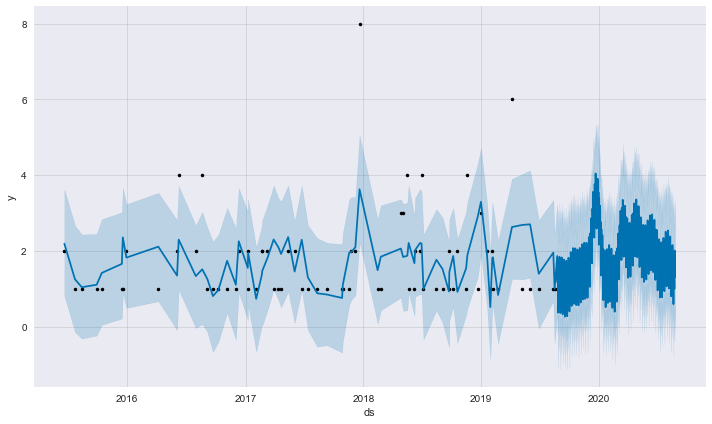

In [72]:
prophet_firearm_violations = ts_firearm_violations.copy()
prophet_model = Prophet()
prophet_model.fit(prophet_firearm_violations)

# Let's try a forecast for 365 days
future = prophet_model.make_future_dataframe(periods=365)
forecast_df = prophet_model.predict(future)
ts_assault = prophet_model.plot(forecast_df)

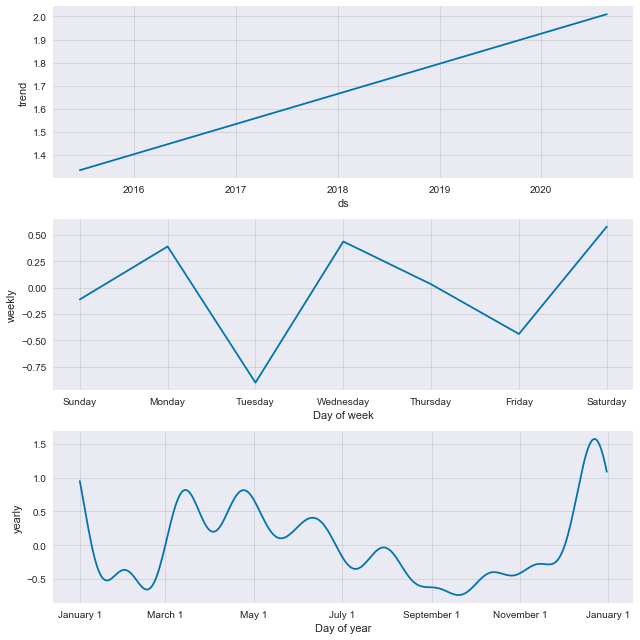

In [73]:
PC = prophet_model.plot_components(forecast_df)

C:\Users\bhavs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


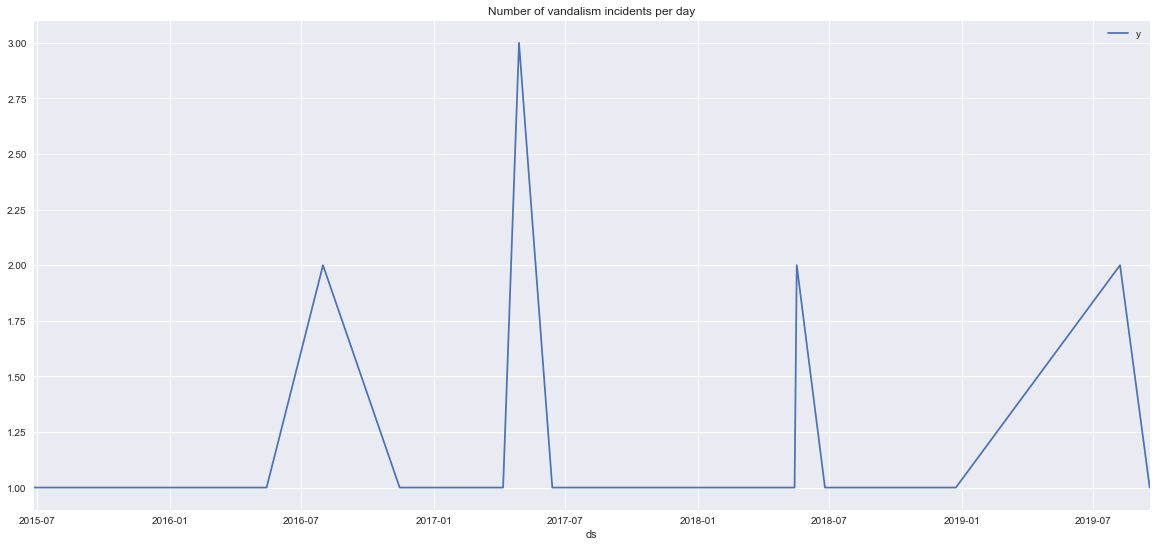

In [74]:
#filtering out the criminal sexual assault from other crime types and then applying time series model
vandalism = crime_data[crime_data['OFFENSE_CODE_GROUP'] == 'Vandalism']
vandalism['Date Only'] = vandalism['OCCURRED_ON_DATE'].dt.date
ts_vandalism = vandalism.groupby('Date Only').count()['OFFENSE_CODE_GROUP'].to_frame()
ts_vandalism.reset_index(inplace=True)
ts_vandalism.columns = ['ds','y']
ts_vandalism.plot(x='ds', title='Number of vandalism incidents per day')
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.


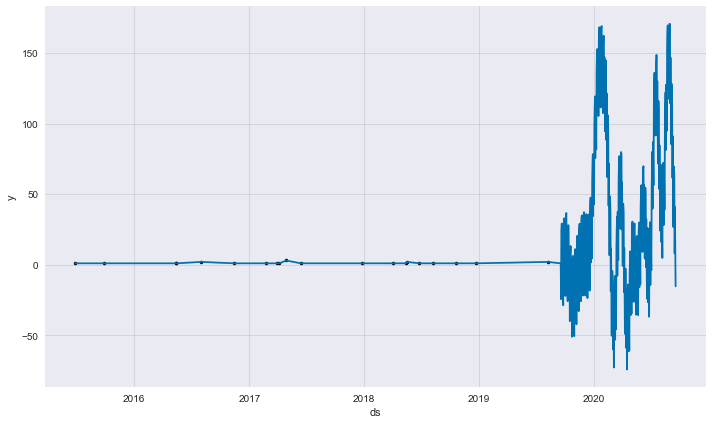

In [75]:
prophet_vandalism = ts_vandalism.copy()
prophet_model = Prophet()
prophet_model.fit(prophet_vandalism)

# Let's try a forecast for 365 days
future = prophet_model.make_future_dataframe(periods=365)
forecast_df = prophet_model.predict(future)
ts_assault = prophet_model.plot(forecast_df)

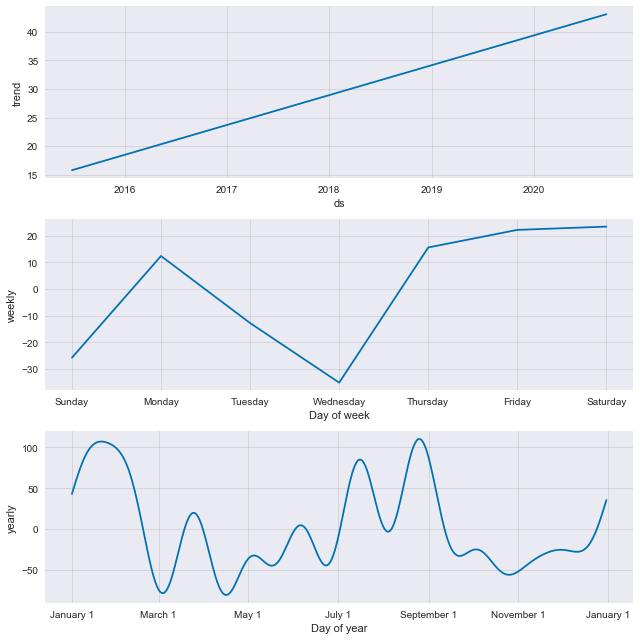

In [76]:
PC = prophet_model.plot_components(forecast_df)

C:\Users\bhavs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


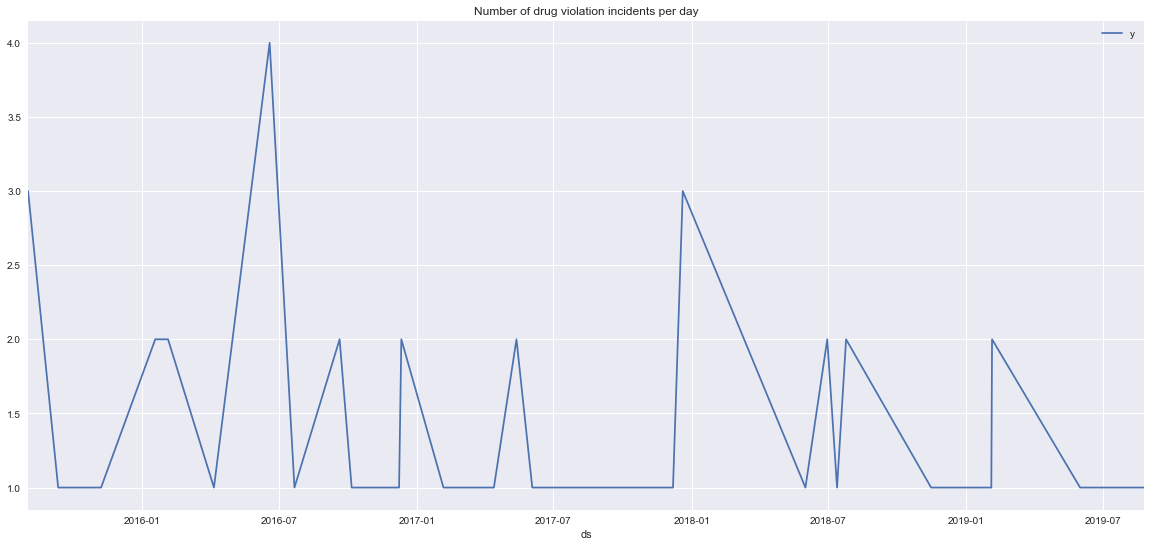

In [77]:
#filtering out the criminal sexual assault from other crime types and then applying time series model
drug_violation = crime_data[crime_data['OFFENSE_CODE_GROUP'] == 'Drug Violation']
drug_violation['Date Only'] = drug_violation['OCCURRED_ON_DATE'].dt.date
ts_drug_violation = drug_violation.groupby('Date Only').count()['OFFENSE_CODE_GROUP'].to_frame()
ts_drug_violation.reset_index(inplace=True)
ts_drug_violation.columns = ['ds','y']
ts_drug_violation.plot(x='ds', title='Number of drug violation incidents per day')
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


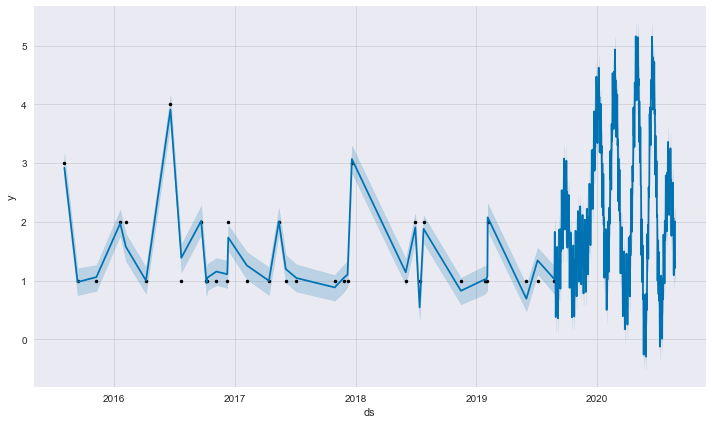

In [78]:
prophet_drug_violation = ts_drug_violation.copy()
prophet_model = Prophet()
prophet_model.fit(prophet_drug_violation)

# Let's try a forecast for 365 days
future = prophet_model.make_future_dataframe(periods=365)
forecast_df = prophet_model.predict(future)
ts_assault = prophet_model.plot(forecast_df)

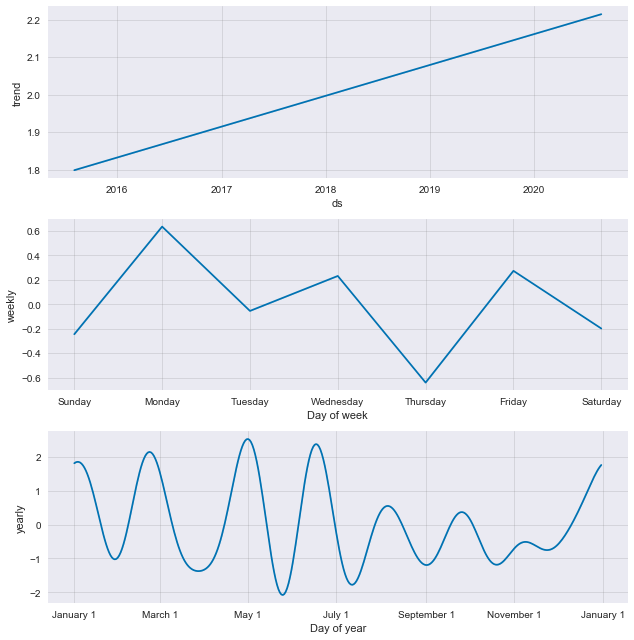

In [79]:
PC = prophet_model.plot_components(forecast_df)

In [80]:
forecast_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-08-03,1.798605,2.729513,3.160346,1.798605,1.798605,1.123229,1.123229,1.123229,0.634780,0.634780,0.634780,0.488448,0.488448,0.488448,0.0,0.0,0.0,2.921834
1,2015-09-12,1.807598,0.752294,1.210353,1.807598,1.807598,-0.831737,-0.831737,-0.831737,-0.198405,-0.198405,-0.198405,-0.633333,-0.633333,-0.633333,0.0,0.0,0.0,0.975861
2,2015-11-08,1.820413,0.826354,1.267532,1.820413,1.820413,-0.759829,-0.759829,-0.759829,-0.245135,-0.245135,-0.245135,-0.514694,-0.514694,-0.514694,0.0,0.0,0.0,1.060584
3,2016-01-19,1.836600,1.770995,2.206981,1.836600,1.836600,0.138492,0.138492,0.138492,-0.054632,-0.054632,-0.054632,0.193123,0.193123,0.193123,0.0,0.0,0.0,1.975092
4,2016-02-05,1.840422,1.339196,1.799558,1.840422,1.840422,-0.262719,-0.262719,-0.262719,0.273057,0.273057,0.273057,-0.535776,-0.535776,-0.535776,0.0,0.0,0.0,1.577703


### Time Series Metrics

In [81]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(prophet_model, initial='730 days', period='90 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 5 forecasts with cutoffs between 2017-08-30 00:00:00 and 2018-08-25 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 14.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.
INFO:fbprophet:n_changepoints greater than number of observations.Using 17.
INFO:fbprophet:n_changepoints greater than number of observations.Using 17.
INFO:fbprophet:n_changepoints greater than number of observations.Using 20.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-10-29,4.518202,4.518197,4.518206,1,2017-08-30
1,2017-11-25,-14.321981,-14.321988,-14.321975,1,2017-08-30
2,2017-12-07,-1.157371,-1.157378,-1.157364,1,2017-08-30
3,2017-12-20,-39.245883,-39.245891,-39.245875,3,2017-08-30
4,2018-06-01,2.426006,2.425983,2.426028,1,2017-08-30


In [82]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,34 days,87.640184,9.361634,6.505823,2.939213,0.0
1,47 days,90.389711,9.507350,7.065447,3.498837,0.0
2,59 days,91.915978,9.587282,7.346971,3.371141,0.0
3,60 days,14.156357,3.762493,3.730577,2.752043,0.0
4,82 days,21.710840,4.659489,4.376633,3.967412,0.0


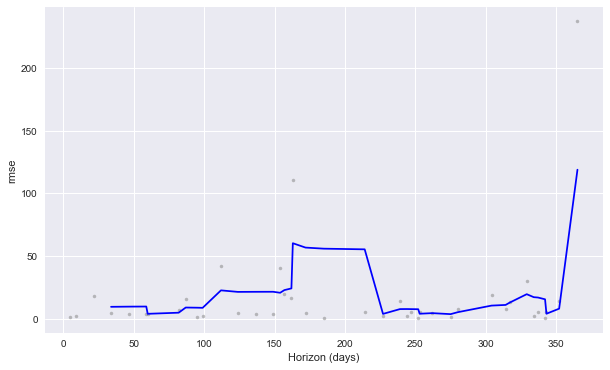

In [83]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')